# import librariyes

In [1]:
pip install association_metrics

  Preparing metadata (setup.py) ... done
  Created wheel for association_metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3930 sha256=18ea527f5f9f6506f046833bbdd10eb17b3e6f3dd9387c128529cc88b7e79be2
  Stored in directory: /root/.cache/pip/wheels/01/47/5f/4360ef6988df6f1b0c1857cab43334269110160bd97b716936
Successfully built association_metrics
Note: you may need to restart the kernel to use updated packages.


In [209]:
### basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")


### Additional libraries
# Methods for calculating the relationship
from scipy.stats import chi2_contingency # cramer's V
import association_metrics as am

 # ANOVA and QQ plot
from statsmodels.formula.api import ols
import statsmodels.api as sm

from sklearn.utils import shuffle #shuffling the data set

import h2o # for Random Forest without having to encode the labels
from h2o.estimators import H2ORandomForestEstimator # for Random Forest without having to encode the labels
h2o.init() # to be connected to all modules

from scipy import stats # for spearman or boxcox

import missingno as msno # it show us the missing values on a graph


# Adapted from https://scikit-learn.org/stable/modules/tree.html#tree
from sklearn import tree
import graphviz 


### model selection 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve,cross_val_score,cross_val_predict


### preprocessing
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler


## Tuning
from sklearn.model_selection import GridSearchCV

### feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,chi2
from sklearn.feature_selection import SelectFromModel


### Metrics
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import make_scorer,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import get_scorer_names
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve,roc_auc_score


### classification algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.tree import DecisionTreeClassifier

### ensemble learning
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier,XGBRFClassifier
from catboost import CatBoostClassifier

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,22 mins 21 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,2 months and 23 days
H2O_cluster_name:,H2O_from_python_unknownUser_rqzswv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.497 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


# About Dataset

## Context

#### Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

## Content

*  Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents

# data understanding and EDA

In [3]:
"""because of having More than the usual columns 
    we can not see all columns without 
    runing the code that right down
"""
pd.set_option("display.max_columns",None)

In [4]:
selected_features=[]
df=pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
              ,na_values=["nan","NaN",np.NaN,""," ",np.nan,"?"]
              )
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
duplicaterows=df[df.duplicated()]
duplicaterows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [6]:
shuffle(df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4919,8242-PDSGJ,Male,0,Yes,No,70,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),39.15,2692.75,No
6617,8822-KNBHV,Female,0,No,No,48,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),83.45,3887.85,No
603,2001-MCUUW,Male,0,No,No,46,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Electronic check,108.65,4903.20,No
4432,3891-NLXJB,Male,0,No,No,37,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Mailed check,40.55,1390.85,No
2608,4323-SADQS,Male,0,Yes,Yes,7,No,No phone service,DSL,Yes,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,34.50,279.25,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1845,4115-UMJFQ,Male,0,No,No,69,No,No phone service,DSL,No,Yes,Yes,No,No,No,One year,Yes,Bank transfer (automatic),35.75,2492.25,No
122,0404-SWRVG,Male,0,No,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,229.55,Yes
2734,2371-JUNGC,Male,0,No,No,11,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.25,208.00,No
6145,5010-IPEAQ,Female,0,Yes,Yes,67,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),54.20,3623.95,No


In [7]:
# how many columns and rows we have
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# let's analyze the target

### yes:left the services within the last month
### no:did not leave tje services

In [10]:
Churn=df["Churn"].value_counts()
Churn

Churn
No     5174
Yes    1869
Name: count, dtype: int64

# The data is imbalanced data

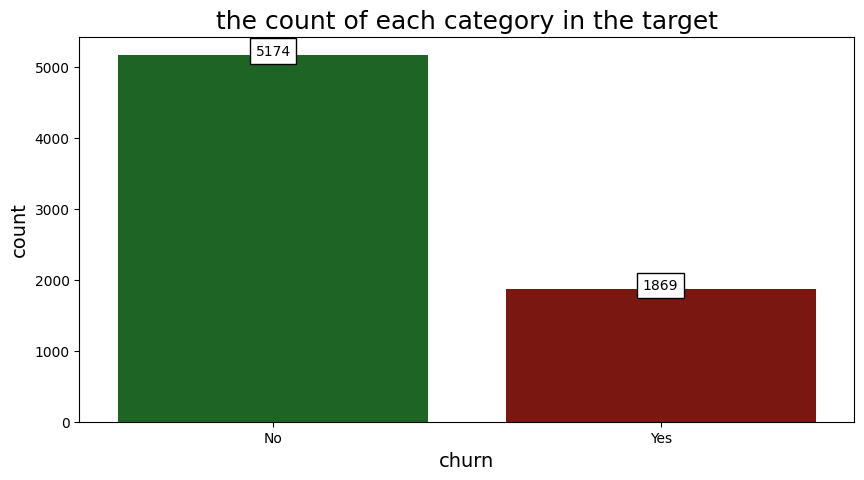

In [11]:
palette_color = sns.color_palette('dark')[2:7]
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,
              x="Churn",
              palette=palette_color,
             )
ax.set_xlabel("churn",fontsize=14)
ax.set_ylabel("count",fontsize=14)
ax.set_title("the count of each category in the target",fontsize=18)

for p in ax.patches:
    ax.annotate(int(p.get_height()),
                (p.get_x()+p.get_width()/2.,p.get_height()),
                ha="center",
                bbox={'facecolor': "white", 'edgecolor': "black"}
               )
    
plt.show()


## the total number of customers who left the services is lower than the total number of who did not

# variation ratio of Churn feature

In [12]:
frequency_table_churn=df["Churn"].value_counts()
frequency_table_churn_values=frequency_table_churn.values
frequency_table_churn_values
majority_churn=frequency_table_churn_values.max()
n=frequency_table_churn_values.sum()
print(f"the count of the most frequent  value in churn feature is: {majority_churn}")
print(f"the count of all values in churn feature is: {n}")
variation_ratio_churn=np.round(1-majority_churn/n,4)
print(f"the variation ratio of churn column is: {variation_ratio_churn}")

the count of the most frequent  value in churn feature is: 5174
the count of all values in churn feature is: 7043
the variation ratio of churn column is: 0.2654


# Descriptive statistical(what happened ?) and Diagnostic(why did it happen ?)

# 1'st feature: customerID

In [13]:
first_15_id=df["customerID"].tolist()[:15]
print(f"{first_15_id}")

['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', '7795-CFOCW', '9237-HQITU', '9305-CDSKC', '1452-KIOVK', '6713-OKOMC', '7892-POOKP', '6388-TABGU', '9763-GRSKD', '7469-LKBCI', '8091-TTVAX', '0280-XJGEX', '5129-JLPIS']


### i think the codes that given to each customer are just written by hashing 

In [14]:
df.drop(columns=["customerID"],axis=1,inplace=True)

# 2'nd feature: gender

In [15]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

## the total number of males almost equal to femals

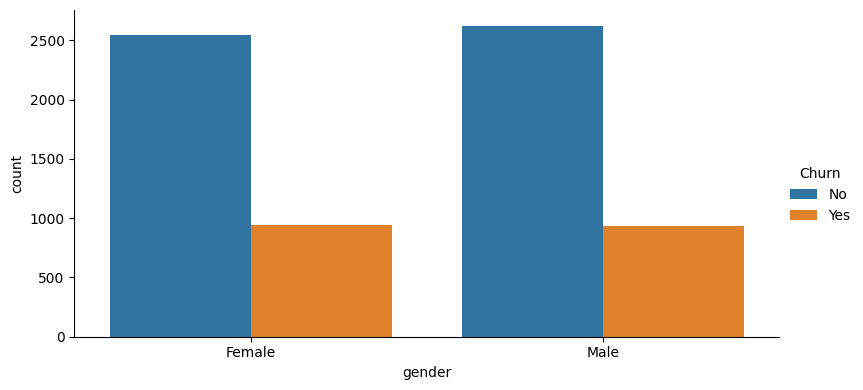

In [16]:
sns.catplot(x="gender", 
            hue="Churn",
            kind="count",
            data=df,
            height=4,
            aspect=2
           )

plt.show()

### i do not think this feature is important to use

## calculating the correlation between two categorical features

In [17]:
def cramers_v_fun(feature_1,feature_2):
    crosstab=np.array(pd.crosstab(feature_1,feature_2))
    stat=chi2_contingency(crosstab)[0]
    obs=np.sum(crosstab)
    mini=min(crosstab.shape)-1
    print(chi2_contingency(crosstab)[1],chi2_contingency(crosstab)[1]<np.power(10.0,-50))
    return round(stat/obs*mini,6)

In [18]:
print(cramers_v_fun(df["Churn"],df["gender"]))

0.48657873605618596 False
6.9e-05


In [19]:
churn_gender=df[["Churn","gender"]]
churn_gender=churn_gender.astype("category")

In [20]:
churn_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Churn   7043 non-null   category
 1   gender  7043 non-null   category
dtypes: category(2)
memory usage: 14.1 KB


In [21]:
cramers_v = am.CramersV(churn_gender)
cfit = cramers_v.fit().round(2)
cfit

,Churn,gender
Churn,1.00,0.01
gender,0.01,1.00


# 3'rd feature: SeniorCitizen

### The “SeniorCitizen” column in your database indicates whether the customer is a senior citizen or not. A value of “Yes”(1) signifies that the customer is 65 years old or older, while a value of “No”(0) signifies that the customer is younger than 65.

In [22]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

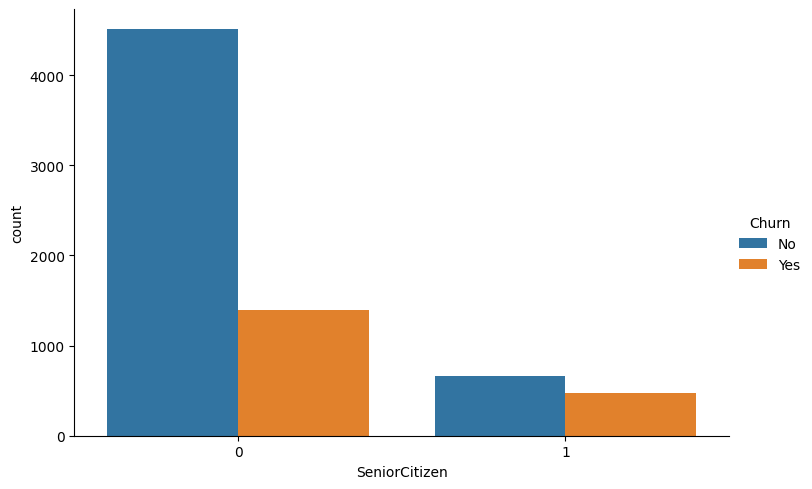

In [23]:
sns.catplot(x="SeniorCitizen", 
            hue="Churn",
            kind="count",
            data=df,
            height=5,
            aspect=1.5
           )

plt.show()

In [24]:
print(cramers_v_fun(df["Churn"],df["SeniorCitizen"]))

1.510066805092378e-36 False
0.022636


# 4'th feature: Partner

In [25]:
df["Partner"].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

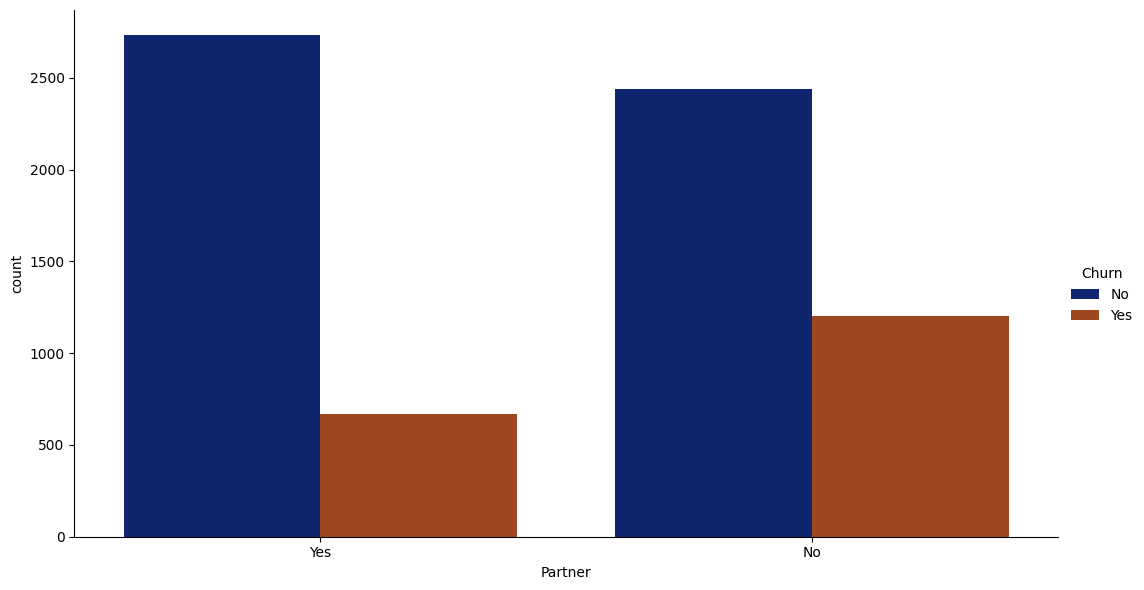

In [26]:
palette_color = sns.color_palette('dark')[:3]
sns.catplot(data=df,
            x="Partner",
            hue="Churn",
            kind="count",
            aspect=1.8,
            height=6,
            palette=palette_color
           )
plt.show()

# 5'th feature: Dependents

In [27]:
df["Dependents"].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [28]:
cramers_v_fun(df["Churn"],df["Dependents"])

4.9249216612154196e-43 False


0.026854

In [29]:
churn_Dependents=df[["Churn","Dependents"]]
churn_Dependents=churn_Dependents.astype("category")
cramers_v = am.CramersV(churn_Dependents)
cfit = cramers_v.fit().round(2)
cfit

,Churn,Dependents
Churn,1.00,0.16
Dependents,0.16,1.00


# 6'th feature: tenure

In [30]:
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

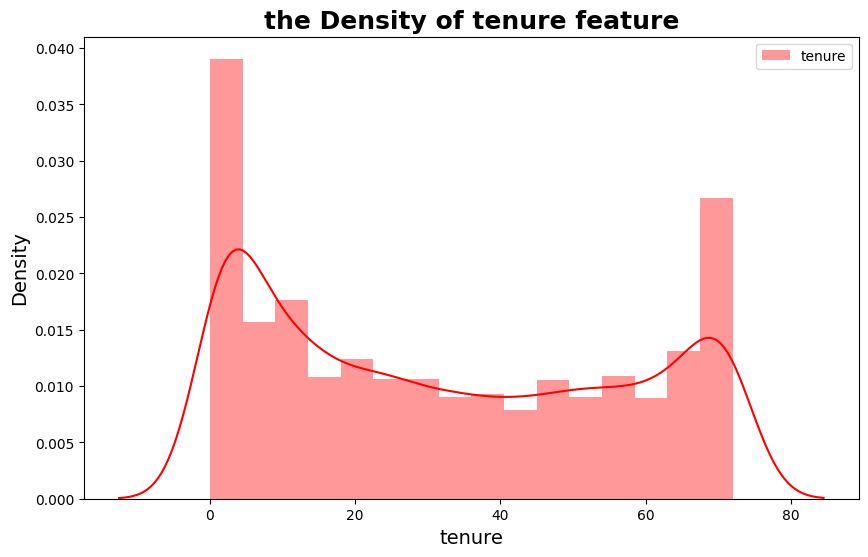

In [31]:
plt.figure(figsize=(10,6))
ax=sns.distplot(df["tenure"],
                rug=False,
                label="tenure",
                color="r"
               ) 

ax.set_xlabel("tenure",
              fontsize=14
             )

ax.set_ylabel("Density",
              fontsize=14
             )

ax.set_title('the Density of tenure feature',
             fontdict={'size':18,'weight':"bold"}
            )
plt.legend()
plt.show()

# QQ plot

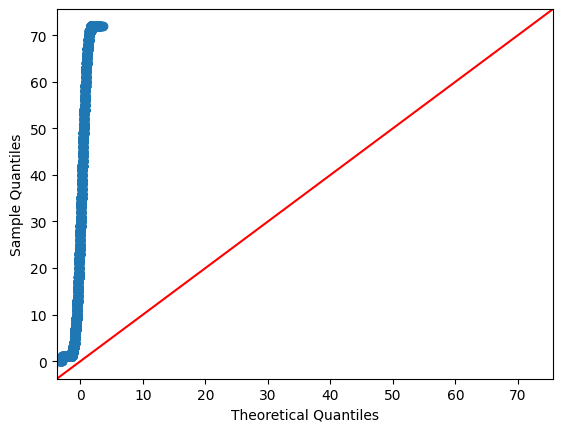

In [32]:
# QQ plot
sm.qqplot(df["tenure"], line ='45')
plt.show()

## Change the data distribution to normal distribution

In [33]:
# because of having non_positive(0) values i did this step
df["tenure"] = df["tenure"] - df["tenure"].min() + 1
# replace the tenure feature with the new feature  which is the normal dist. of it
fittedData_tenure, lambdaValue = stats.boxcox(df["tenure"])
df["tenure"] = fittedData_tenure


## I noticed that there are even customers who have not completed the month

In [34]:
tenure_0=df[df["tenure"]==0]
print(f"the total number of customers who have not competed the month: {tenure_0.shape[0]}")
print(tenure_0["Churn"].value_counts())
tenure_0.head()

the total number of customers who have not competed the month: 11
Churn
No    11
Name: count, dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0.0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0.0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


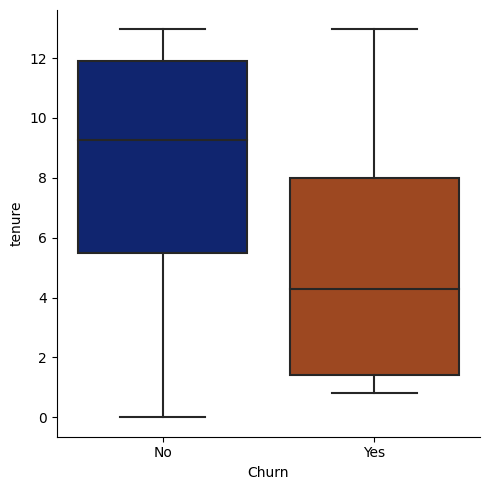

In [35]:
alette_color = sns.color_palette('bright')
sns.catplot(y="tenure",
            data=df,
            kind="box",
            x="Churn",
            palette=palette_color
           )
plt.show();

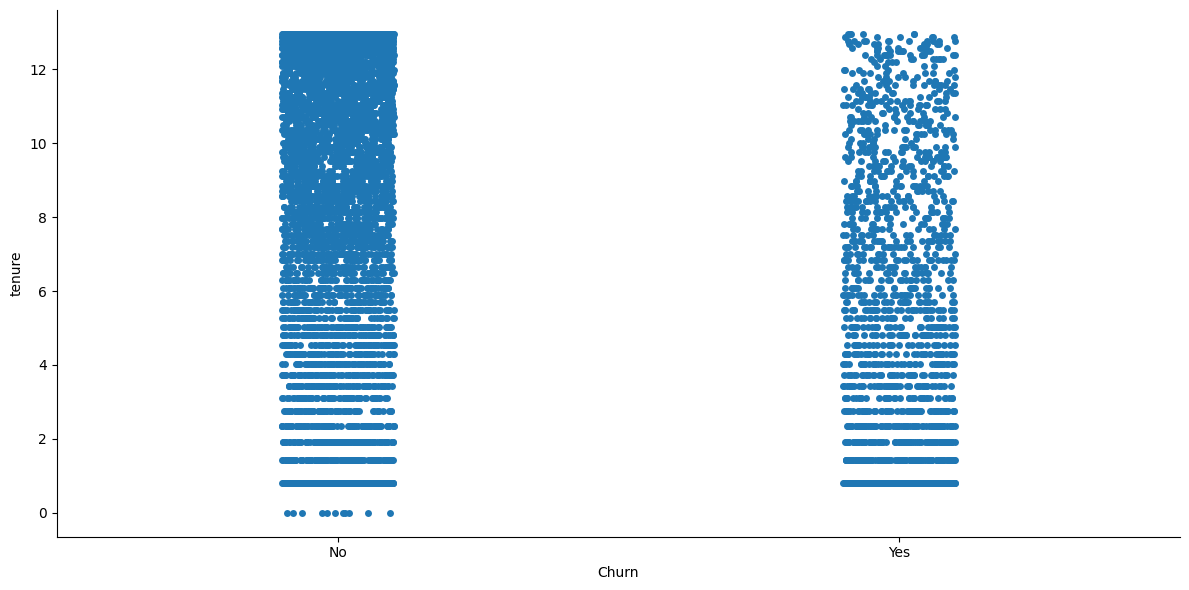

In [36]:
sns.catplot(data=df, 
            x="Churn",
            y="tenure", 
            height=6, 
            aspect=2
           )
plt.show()

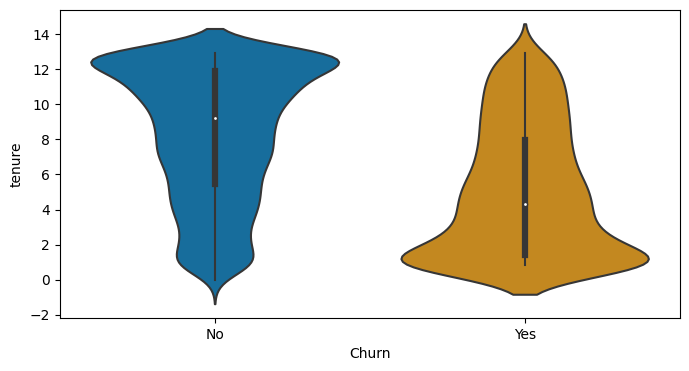

In [37]:
palette=sns.color_palette("colorblind")
plt.figure(figsize=(8,4))
sns.violinplot(data=df,
               x="Churn",
               y="tenure",
               palette=palette
              )
plt.show()

## let's show anova table

In [38]:
mod=ols("tenure ~ Churn",data=df).fit()
ANOVA_table=sm.stats.anova_lm(mod,typ=2) 
ANOVA_table

,sum_sq,df,F,PR(>F)
Churn,15942.794853,1.0,1116.662888,2.182793e-227
Residual,100525.610526,7041.0,NaN,NaN


## i think this columns is good to predict the target

In [39]:
selected_features.append("tenure")

# all Services features

In [40]:
df.groupby(by=["PhoneService","MultipleLines"],
           as_index=False).size()

,PhoneService,MultipleLines,size
0,No,No phone service,682
1,Yes,No,3390
2,Yes,Yes,2971


In [41]:
df.groupby(by=["PhoneService","Churn"],
           as_index=False).size()

,PhoneService,Churn,size
0,No,No,512
1,No,Yes,170
2,Yes,No,4662
3,Yes,Yes,1699


In [42]:
cramers_v_fun(df["PhoneService"],df["Churn"])

0.3387825358066928 False


0.00013

## here we noticed that the customers who left the services,the total number of customers who had phone services is more than who did not

## phone service feature is not important to predict the targert so also multiple lines feature is not

In [43]:
df.groupby(by=["InternetService","Churn"],
           as_index=False).size()

,InternetService,Churn,size
0,DSL,No,1962
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1413
5,No,Yes,113


## the customers who had internet service especially who took (DSL) type has more probability of not leaving the company and also the customers who has not taken the internet service has more greater chance of not leaving the company

In [44]:
cramers_v_fun(df["InternetService"],df["Churn"])

9.571788222840544e-160 True


0.103977

In [45]:
churn_InternetService=df[["InternetService","Churn"]]
churn_InternetService=churn_InternetService.astype("category")
cramers_v = am.CramersV(churn_InternetService)
cfit = cramers_v.fit().round(2)
cfit

,InternetService,Churn
InternetService,1.00,0.32
Churn,0.32,1.00


In [46]:
df.groupby(by=["InternetService","OnlineSecurity"],
           as_index=False).size()

,InternetService,OnlineSecurity,size
0,DSL,No,1241
1,DSL,Yes,1180
2,Fiber optic,No,2257
3,Fiber optic,Yes,839
4,No,No internet service,1526


In [47]:
df.groupby(by=["InternetService","OnlineBackup"],
           as_index=False).size()

,InternetService,OnlineBackup,size
0,DSL,No,1335
1,DSL,Yes,1086
2,Fiber optic,No,1753
3,Fiber optic,Yes,1343
4,No,No internet service,1526


In [48]:
selected_features+=["InternetService","OnlineSecurity","DeviceProtection","TechSupport","StreamingMovies","StreamingTV"]

# Contract feature

In [49]:
df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [50]:
df.groupby(by=["Contract","Churn"],
           as_index=False).size()

,Contract,Churn,size
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


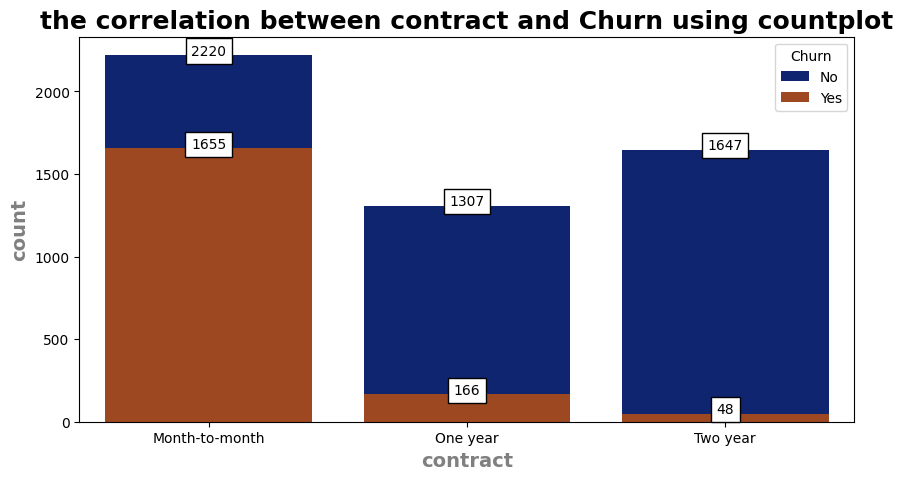

In [51]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="Contract",
                 data=df,
                 hue="Churn",
                 palette=sns.color_palette("dark"),
                 dodge=False,
                 width=0.8,
                )

for p in ax.patches:
  #percent=f"{(p.get_height()/num_col)*100:.2f}%"
  ax.annotate(int(p.get_height()),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha="center",
              bbox={'facecolor': "white", 'edgecolor': "black"}
             )
    
    
ax.set_xlabel("contract",
              fontdict={'size': 14, 'weight': 'bold','color': 'grey'}
             )

ax.set_ylabel("count",
              fontdict={'size': 14, 'weight': 'bold','color': 'grey'}
             )

ax.set_title("the correlation between contract and Churn using countplot",
            fontdict={'size':18,'weight':"bold"}
            )
plt.show()

## here in this feature i noticed that the customers who had taken month to moth contract had more probability to leave the company

In [52]:
cramers_v_fun(df["Contract"],df["Churn"])

5.863038300673391e-258 True


0.168195

In [53]:
churn_Contract=df[["Churn","Contract"]]
churn_Contract=churn_Contract.astype("category")
cramers_v = am.CramersV(churn_Contract)
cfit = cramers_v.fit().round(2)
cfit

,Churn,Contract
Churn,1.00,0.41
Contract,0.41,1.00


In [54]:
selected_features.append("Contract")

## PaperlessBilling: The “PaperlessBilling” column in your database indicates whether the customer uses electronic billing or not. A value of “Yes” signifies that the customer uses electronic billing, while a value of “No” signifies that the customer does not use electronic billing.


In [55]:
df["PaperlessBilling"].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

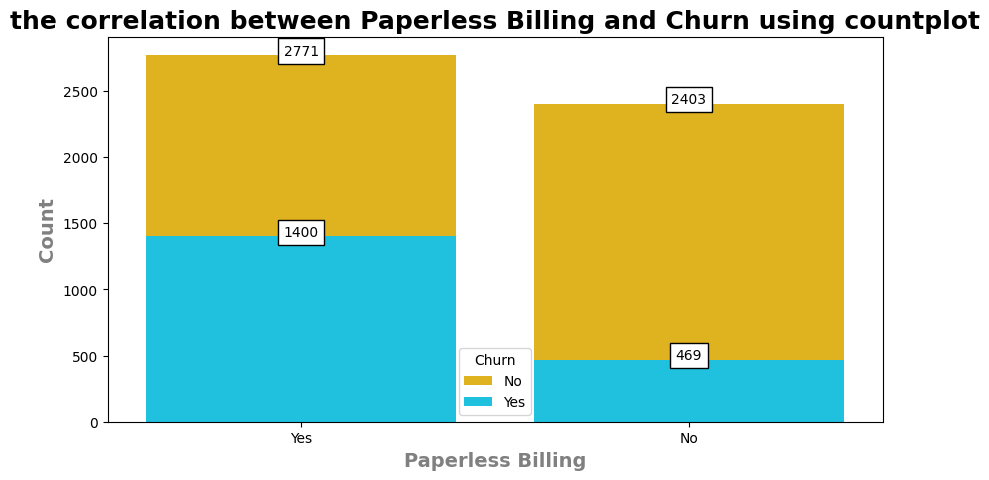

In [56]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="PaperlessBilling",
                 data=df,
                 hue="Churn",
                 palette=sns.color_palette("bright")[8:10],
                 dodge=False,
                 width=0.8,
                )

for p in ax.patches:
  #percent=f"{(p.get_height()/num_col)*100:.2f}%"
  ax.annotate(int(p.get_height()),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha="center",
              bbox={'facecolor': "white", 'edgecolor': "black"}
             )
    
    
ax.set_xlabel("Paperless Billing",
              fontdict={'size': 14, 'weight': 'bold','color': 'grey'}
             )

ax.set_ylabel("Count",
              fontdict={'size': 14, 'weight': 'bold','color': 'grey'}
             )

ax.set_title("the correlation between Paperless Billing and Churn using countplot",
            fontdict={'size':18,'weight':"bold"}
            )
plt.show()

In [57]:
cramers_v_fun(df["PaperlessBilling"],df["Churn"])

4.073354668665985e-58 True


0.036672

# PaymentMethod feature

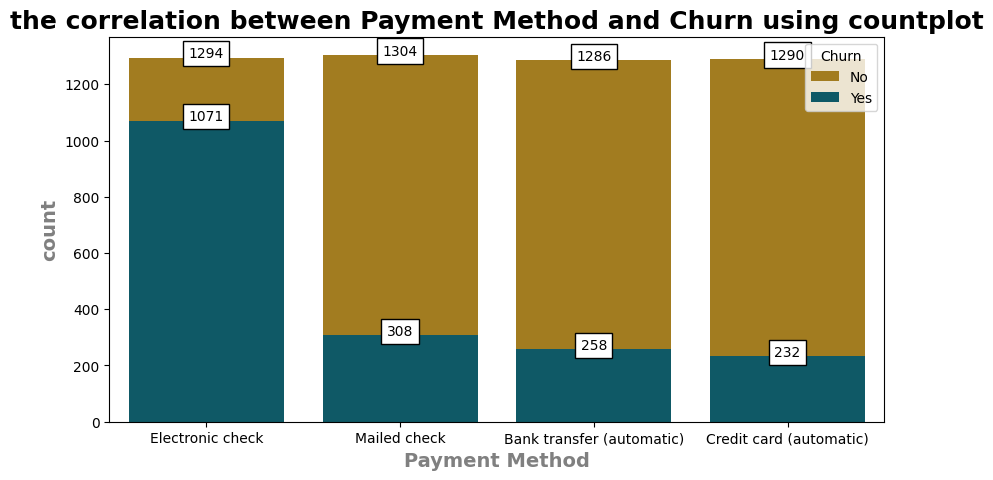

In [58]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="PaymentMethod",
                 data=df,
                 hue="Churn",
                 palette=sns.color_palette("dark")[8:10],
                 dodge=False,
                 width=0.8,
                )

for p in ax.patches:
  #percent=f"{(p.get_height()/num_col)*100:.2f}%"
  ax.annotate(int(p.get_height()),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha="center",
              bbox={'facecolor': "white", 'edgecolor': "black"}
             )
    
    
ax.set_xlabel("Payment Method",
              fontdict={'size': 14, 'weight': 'bold','color': 'grey'}
             )

ax.set_ylabel("count",
              fontdict={'size': 14, 'weight': 'bold','color': 'grey'}
             )

ax.set_title("the correlation between Payment Method and Churn using countplot",
            fontdict={'size':18,'weight':"bold"}
            )
plt.show() 

In [59]:
cramers_v_fun(df["PaymentMethod"],df["Churn"])
selected_features.append('PaymentMethod')

3.6823546520097993e-140 True


# MonthlyCharges and TotalCharges features

## MonthlyCharges feature

In [60]:
df["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

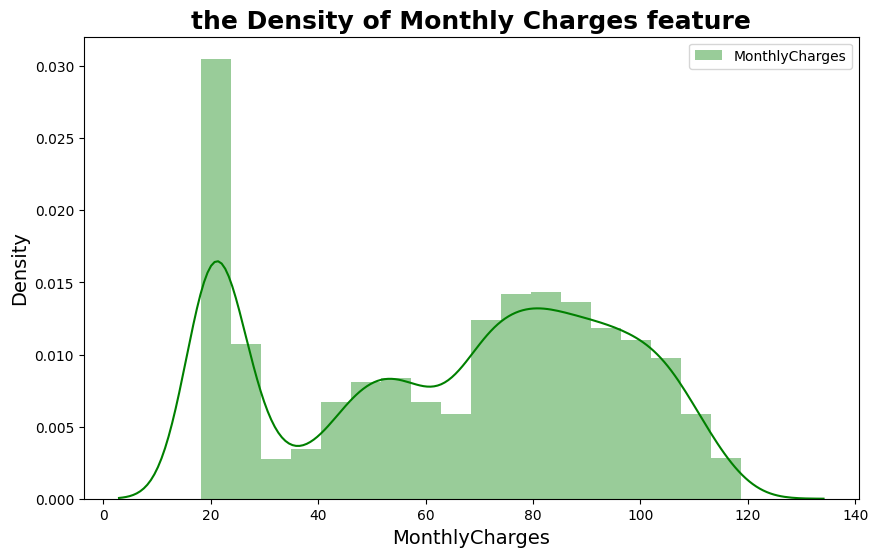

In [61]:
plt.figure(figsize=(10,6))
ax=sns.distplot(df["MonthlyCharges"],
                rug=False,
                label="MonthlyCharges",
                color="g"
               )

ax.set_xlabel("MonthlyCharges",
              fontsize=14
             )

ax.set_ylabel("Density",
              fontsize=14
             )

ax.set_title('the Density of Monthly Charges feature',
             fontdict={'size':18,'weight':"bold"}
            )
plt.legend()
plt.show()

# QQ plot

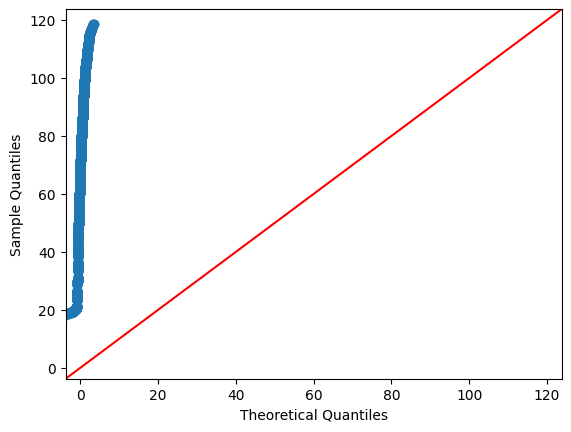

In [62]:
# QQ plot
sm.qqplot(df["MonthlyCharges"], line ='45')
plt.show()

## Change the data distribution to normal distribution

In [63]:
# replace the MonthlyCharges feature with the new feature  which is the normal dist. of it
fittedData_MonthlyCharges, lambdaValue = stats.boxcox(df["MonthlyCharges"])
df["MonthlyCharges"] = fittedData_MonthlyCharges


# barplot

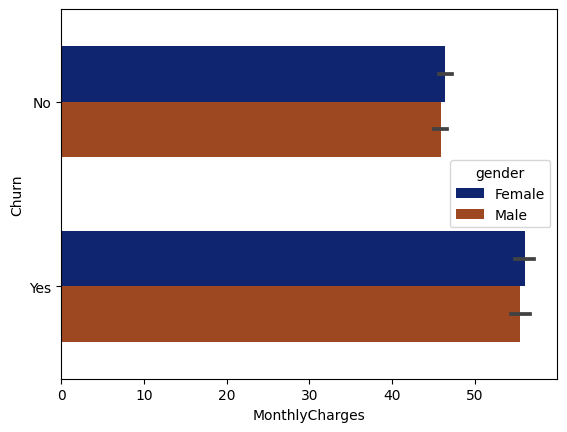

In [64]:
ax=sns.barplot(data=df,
               y="Churn",
               x="MonthlyCharges",
               hue="gender",
               estimator='mean',
               dodge=True,
               width=0.6,
               palette=sns.color_palette("dark")
              )
plt.show()

# TotalCharges feature

In [65]:
df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

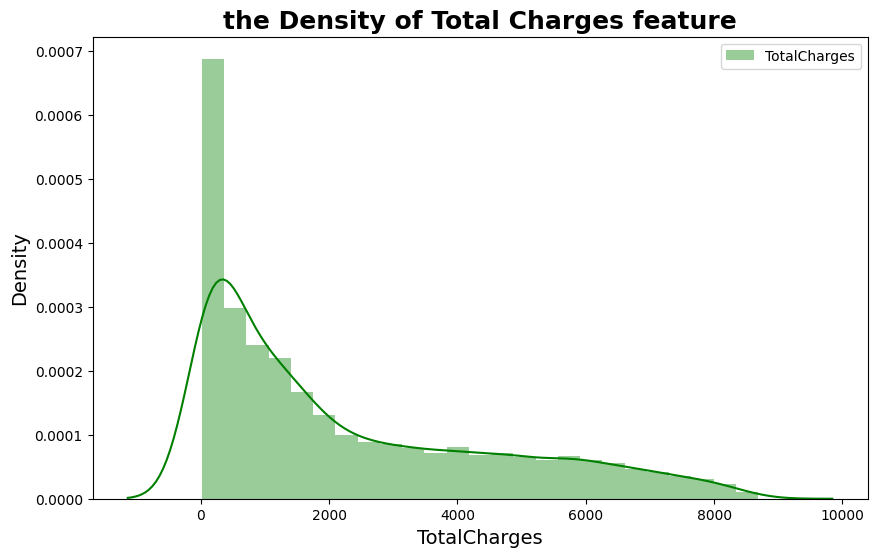

In [66]:
plt.figure(figsize=(10,6))
ax=sns.distplot(df["TotalCharges"],
                rug=False,
                label="TotalCharges",
                color="g"
               )

ax.set_xlabel("TotalCharges",
              fontsize=14
             )

ax.set_ylabel("Density",
              fontsize=14
             )

ax.set_title('the Density of Total Charges feature',
             fontdict={'size':18,'weight':"bold"}
            )
plt.legend()
plt.show()

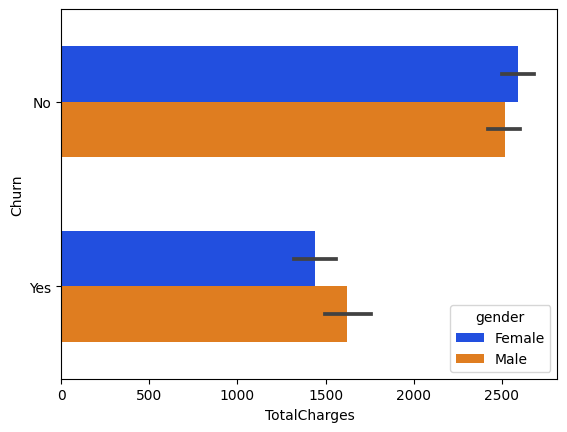

In [67]:
ax=sns.barplot(data=df,
               y="Churn",
               x="TotalCharges",
               hue="gender",
               estimator='mean',
               dodge=True,
               width=0.6,
               palette=sns.color_palette("bright")
              )
plt.show()

# the correlation between TotalCharges and MonthlyCharges features

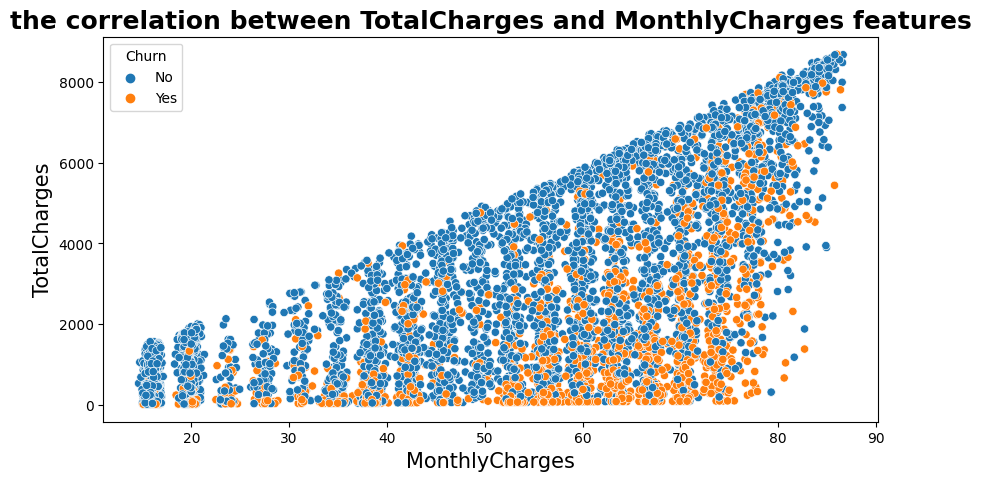

In [68]:
plt.figure(figsize=(10,5))
ax=sns.scatterplot(data=df
                ,x="MonthlyCharges",
                y="TotalCharges",
                hue="Churn"
               )

ax.set_xlabel("MonthlyCharges",
              fontsize=15
             )

ax.set_ylabel("TotalCharges",
              fontsize=15
             )
ax.set_title('the correlation between TotalCharges and MonthlyCharges features',
             fontdict={'size':18,'weight':"bold"}
            )

plt.show()

# the correlation between tenure and TotalCharges features 

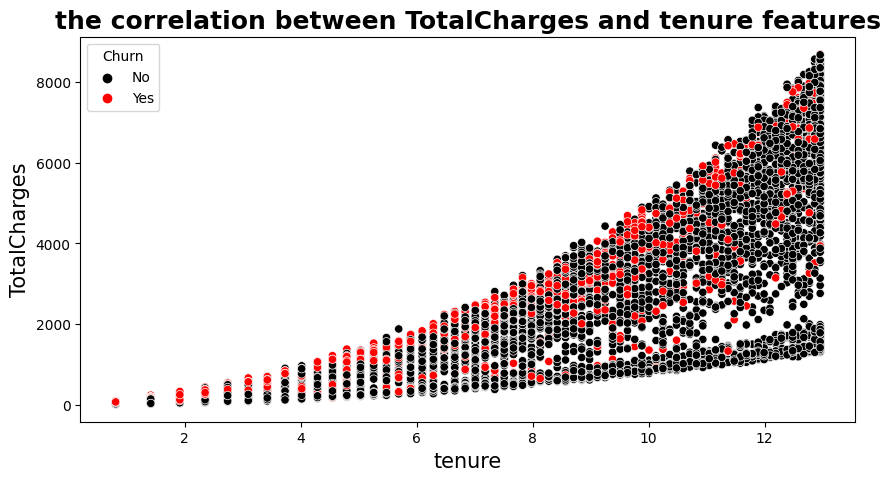

In [69]:
plt.figure(figsize=(10,5))
ax=sns.scatterplot(data=df
                ,x="tenure",
                y="TotalCharges",
                hue="Churn",
                palette=["black", "red"]  # Change the colors here
               )

ax.set_xlabel("tenure",
              fontsize=15
             )

ax.set_ylabel("TotalCharges",
              fontsize=15
             )
ax.set_title('the correlation between TotalCharges and tenure features',
             fontdict={'size':18,'weight':"bold"}
            )

plt.show()


# using anova method for TotalCharges and MonthlyCharges features with the target

In [70]:
mod=ols("TotalCharges ~ Churn",data=df).fit()
ANOVA_table=sm.stats.anova_lm(mod,typ=2) 
ANOVA_table

,sum_sq,df,F,PR(>F)
Churn,1.437636e+09,1.0,291.344862,4.876866e-64
Residual,3.468942e+10,7030.0,NaN,NaN


In [71]:
mod=ols("MonthlyCharges ~ Churn",data=df).fit()
ANOVA_table=sm.stats.anova_lm(mod,typ=2) 
ANOVA_table

,sum_sq,df,F,PR(>F)
Churn,1.263481e+05,1.0,278.803363,2.054401e-61
Residual,3.190839e+06,7041.0,NaN,NaN


In [72]:
selected_features+=["MonthlyCharges","TotalCharges"]

# feature extraction

### 1. creating a new feature depending on tenure feature,the new feature includes that if the customer has been more than 1 year or not in the company

# data binning

In [73]:
tenure_bins=[-np.inf,12-np.power(10.0,-5),np.inf]
tenure_labels=["less_than_year","more than a year"]
df["tenure_year"]=pd.cut(df["tenure"],
                         bins=tenure_bins,
                         labels=tenure_labels
                        )

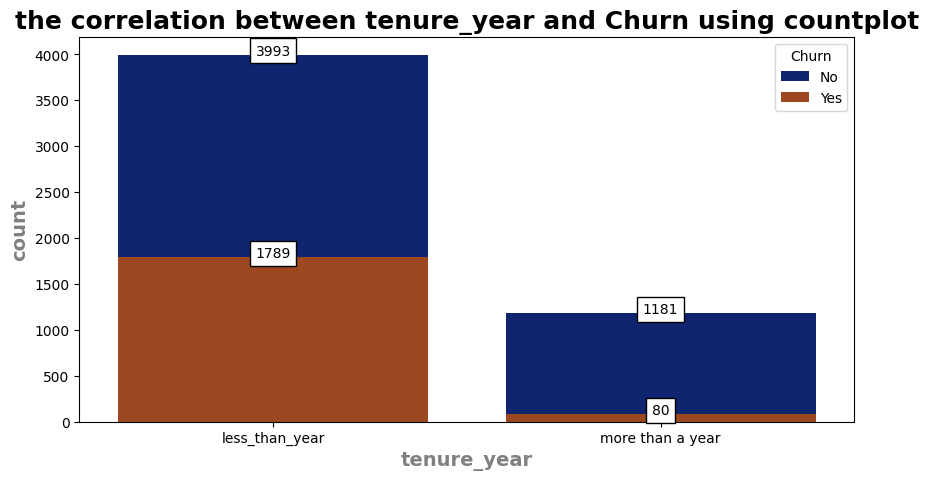

In [74]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="tenure_year",
                 data=df,
                 hue="Churn",
                 palette=sns.color_palette("dark"),
                 dodge=False,
                 width=0.8,
                )

for p in ax.patches:
  #percent=f"{(p.get_height()/num_col)*100:.2f}%"
  ax.annotate(int(p.get_height()),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha="center",
              bbox={'facecolor': "white", 'edgecolor': "black"}
             )
    
    
ax.set_xlabel("tenure_year",
              fontdict={'size': 14, 'weight': 'bold','color': 'grey'}
             )

ax.set_ylabel("count",
              fontdict={'size': 14, 'weight': 'bold','color': 'grey'}
             )

ax.set_title("the correlation between tenure_year and Churn using countplot",
            fontdict={'size':18,'weight':"bold"}
            )
plt.show()

In [75]:
cramers_v_fun(df["tenure_year"],df["Churn"])
selected_features.append("tenure_year")

1.442635872617136e-71 True


### 2. I noticed that in payment method feature,the customers who had taken electronic check had more probability to leave the company

In [76]:
def PaymentMethod_electronic_check(PaymentMethod):
    list_PaymentMethod=[]
    for method in PaymentMethod:
        if method=="Electronic check":
            list_PaymentMethod.append(method)
        else:
            list_PaymentMethod.append("another_PaymentMethod")
    return np.array(list_PaymentMethod)

df["PaymentMethod_electronic_check"]=PaymentMethod_electronic_check(df["PaymentMethod"])

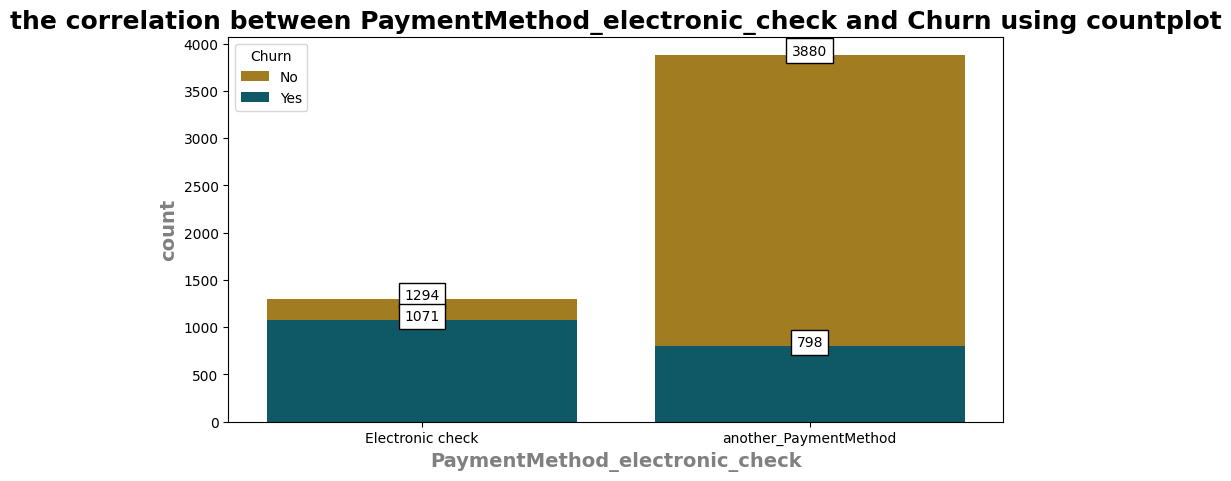

In [77]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x="PaymentMethod_electronic_check",
                 data=df,
                 hue="Churn",
                 palette=sns.color_palette("dark")[8:10],
                 dodge=False,
                 width=0.8,
                )

for p in ax.patches:
  #percent=f"{(p.get_height()/num_col)*100:.2f}%"
  ax.annotate(int(p.get_height()),
              (p.get_x()+p.get_width()/2.,p.get_height()),
              ha="center",
              bbox={'facecolor': "white", 'edgecolor': "black"}
             )
    
    
ax.set_xlabel("PaymentMethod_electronic_check",
              fontdict={'size': 14, 'weight': 'bold','color': 'grey'}
             )

ax.set_ylabel("count",
              fontdict={'size': 14, 'weight': 'bold','color': 'grey'}
             )

ax.set_title("the correlation between PaymentMethod_electronic_check and Churn using countplot",
            fontdict={'size':18,'weight':"bold"}
            )
plt.show() 

In [78]:
cramers_v_fun(df["PaymentMethod_electronic_check"],df["Churn"])

2.5280301640755437e-141 True


0.090949

## 3. we'll create a new column represents the total number of services that the customers required

In [79]:
def number_counter(customer):
    counter=0
    if (customer["PhoneService"].item()=="Yes"):
        counter+=1
    if (customer["MultipleLines"].item()=="Yes"):
        counter+=1
    if (customer["InternetService"].item()!="No"):
        counter+=1
    if (customer["OnlineSecurity"].item()=="Yes"):
        counter+=1
    if (customer["OnlineBackup"].item()=="Yes"):
        counter+=1
    if (customer["DeviceProtection"].item()=="Yes"):
        counter+=1
    if (customer["TechSupport"].item()=="Yes"):
        counter+=1
    if (customer["StreamingTV"].item()=="Yes"):
        counter+=1
    if (customer["StreamingMovies"].item()=="Yes"):
        counter+=1
    return counter


def number_of_services(df):
    number_services_list=[]
    for customer_index in range(df.shape[0]):
        customer=df.iloc[[customer_index],:]
        count=number_counter(customer)
        number_services_list.append(count)
    return number_services_list
df["number_of_services"]=number_of_services(df)

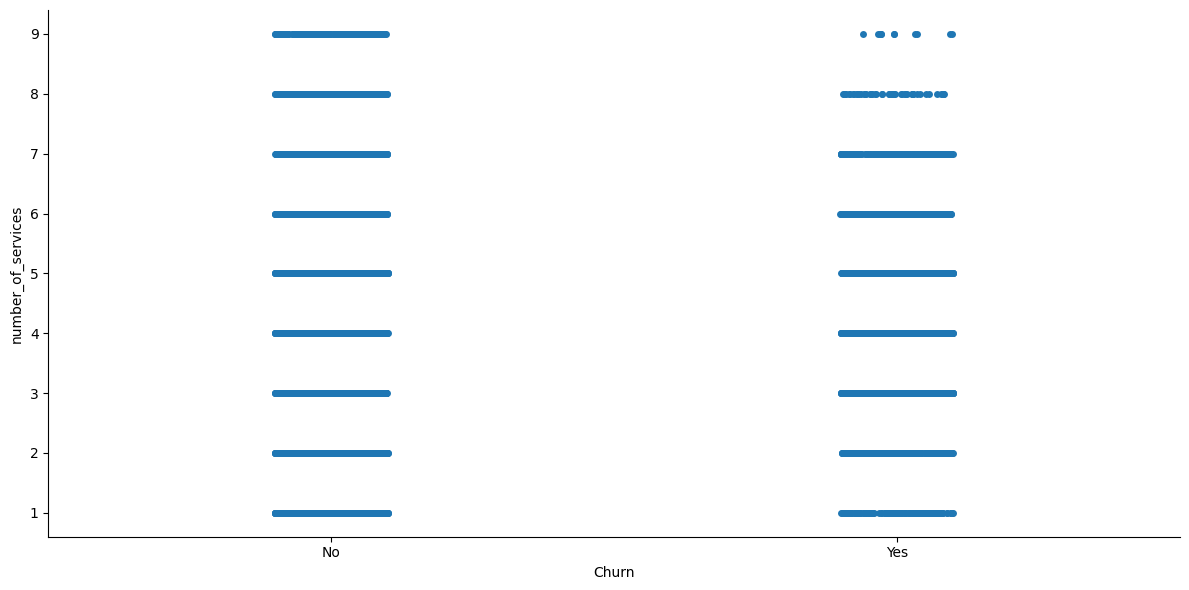

In [80]:
sns.catplot(data=df, 
            x="Churn",
            y="number_of_services", 
            height=6, 
            aspect=2
           )
plt.show()

In [81]:
mod=ols("number_of_services ~ Churn",data=df).fit()
ANOVA_table=sm.stats.anova_lm(mod,typ=2) 
ANOVA_table

,sum_sq,df,F,PR(>F)
Churn,14.138953,1.0,2.644067,0.103982
Residual,37651.229214,7041.0,NaN,NaN


# This new feature is not important at all

In [82]:
df.drop(["number_of_services"], axis=1, inplace=True)

# data analysis(answer for some questions)

## 1. plot the correlation between TotalCharges and tenure using hexagonal bins to see the density between them

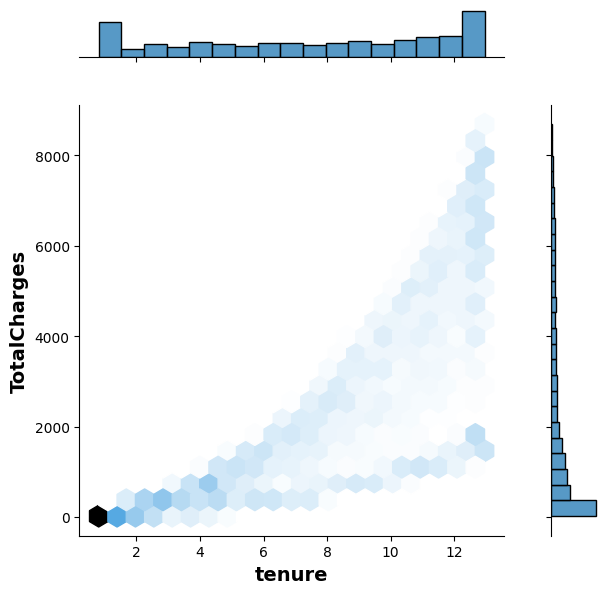

In [83]:
ax=sns.jointplot(data=df,
              x="tenure",
              y="TotalCharges",
              height=6,
              space=1,
              hue=None,
              dropna=True,
              kind="hex"
             )
plt.xlabel("tenure",
              fontdict={'size': 14, 'weight': 'bold','color': 'black'}
             )

plt.ylabel("TotalCharges",
              fontdict={'size': 14, 'weight': 'bold','color': 'black'}
             )

plt.show()

## 2. let's see all customers who took all services and analyze the total charges and the gender of them

In [84]:
data_all_services=df[(df["MultipleLines"]=="Yes") & 
   (df["InternetService"]!="No") & 
   (df["OnlineSecurity"]=="Yes") &
   (df["OnlineBackup"]=="Yes") &
   (df["DeviceProtection"]=="Yes") &
   (df["TechSupport"]=="Yes") & 
   (df["StreamingTV"]=="Yes") & 
   (df["StreamingMovies"]=="Yes")]

data_all_services.sort_values(by=["tenure"],
                              ascending=True,
                              inplace=True
                             )
data_all_services.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_year,PaymentMethod_electronic_check
1140,Female,0,No,Yes,5.033832,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),66.190042,1161.75,No,less_than_year,another_PaymentMethod
5191,Female,0,Yes,Yes,7.011478,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),67.682962,2198.30,No,less_than_year,another_PaymentMethod
3489,Female,0,Yes,No,7.510676,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),66.988940,2312.55,No,less_than_year,another_PaymentMethod
4807,Female,0,No,Yes,8.707660,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),84.883651,3946.90,No,less_than_year,another_PaymentMethod
500,Male,0,No,No,8.707660,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),84.951667,3899.05,No,less_than_year,another_PaymentMethod


In [85]:
# there are 208 customers in my data how received all services
data_all_services.shape

(208, 22)

In [86]:
#There is a greater possibility of customers who have received all the services to stay with the company
data_all_services["Churn"].value_counts()

Churn
No     197
Yes     11
Name: count, dtype: int64

In [87]:
# This means that the more services a customer takes, the more likely he is to stay in the company
data_all_services["tenure_year"].value_counts()

tenure_year
more than a year    168
less_than_year       40
Name: count, dtype: int64

In [88]:
# now will see the average of total charges according to gender
data_all_services_gender = data_all_services.groupby(by=["gender"])
data_all_services_gender = data_all_services_gender.agg({"TotalCharges": ["mean", "std"], "gender": "count"}).reset_index()
data_all_services_gender.columns = ['_'.join(col).strip() for col in data_all_services_gender.columns.values]

# Calculate Coefficient of Variation
data_all_services_gender['TotalCharges_CV'] = data_all_services_gender['TotalCharges_std'] / data_all_services_gender['TotalCharges_mean']
data_all_services_gender

,gender_,TotalCharges_mean,TotalCharges_std,gender_count,TotalCharges_CV
0,Female,6806.417105,1481.273246,114,0.217629
1,Male,7127.300000,1160.593920,94,0.162838


## 3. we'll use groupby method to group the data according to gender and then will calculate the average of total charges

In [89]:
df.groupby(by=["gender"]).agg(func={"TotalCharges":"mean"})

,TotalCharges
gender,
Female,2283.190985
Male,2283.407861


# split the data to X_train and y_train

In [90]:
selected_features=selected_features+["Churn"]

In [91]:
df=df[selected_features]

In [92]:
X_train=df.drop(["Churn"],axis=1)
y_train=df[["Churn"]]

In [93]:
X_train_col=X_train.columns.tolist()
y_train_col=y_train.columns.tolist()

# Experiment with the Random Forest model before processing the data

In [94]:
df_h2o=pd.DataFrame(np.c_[X_train,y_train],columns=X_train_col+y_train_col)
df_h2o=h2o.H2OFrame(df_h2o)

# Define model
h2o_random_forest_cls = H2ORandomForestEstimator(keep_cross_validation_predictions=True,
                                                 nfolds=5,
                                                 ntrees=50,
                                                 max_depth=4
                                                )  # Enable 5-fold cross-validation
h2o_random_forest_cls.train(x=X_train_col, y=y_train_col[0], training_frame=df_h2o)
cv_summary = h2o_random_forest_cls.cross_validation_metrics_summary().as_data_frame()
cv_summary

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.788421,0.013035,0.769395,0.801117,0.795422,0.795406,0.780764
1,auc,0.842085,0.010201,0.831623,0.846219,0.856342,0.843364,0.832876
2,err,0.211579,0.013035,0.230605,0.198883,0.204578,0.204594,0.219236
3,err_count,298.000000,18.041618,324.000000,285.000000,286.000000,285.000000,310.000000
4,f0point5,0.605020,0.016963,0.592269,0.631868,0.594960,0.594109,0.611896
5,f1,0.642361,0.012667,0.637584,0.659498,0.640703,0.625493,0.648526
6,f2,0.684866,0.013807,0.690407,0.689655,0.694066,0.660377,0.689822
7,lift_top_group,3.474783,0.403329,2.882051,3.462468,3.453273,4.014409,3.561713
8,logloss,0.426367,0.017996,0.441393,0.425607,0.404531,0.413366,0.446938
9,max_per_class_error,0.283348,0.019497,0.269231,0.288660,0.265130,0.314121,0.279597


# Data Preprocessing And Cleaning

## I'll use Pipeline to process the data and avoiding data leakage

## Qualitative features

In [95]:
X_train_col_categ=X_train.select_dtypes(include=["O","category"]).columns.tolist()
X_train_col_categ

['InternetService',
 'OnlineSecurity',
 'DeviceProtection',
 'TechSupport',
 'StreamingMovies',
 'StreamingTV',
 'Contract',
 'PaymentMethod',
 'tenure_year']

In [96]:
for i in range(len(X_train_col_categ)):
    col=X_train[X_train_col_categ[i]]
    print(f"the feature is {X_train_col_categ[i]} and its total number of categories: {col.nunique()}")

the feature is InternetService and its total number of categories: 3
the feature is OnlineSecurity and its total number of categories: 3
the feature is DeviceProtection and its total number of categories: 3
the feature is TechSupport and its total number of categories: 3
the feature is StreamingMovies and its total number of categories: 3
the feature is StreamingTV and its total number of categories: 3
the feature is Contract and its total number of categories: 3
the feature is PaymentMethod and its total number of categories: 4
the feature is tenure_year and its total number of categories: 2


# i'll process some columns which have different value than others

In [97]:
for cat_feat in X_train_col_categ:
    categories=X_train[cat_feat].tolist()
    if 'No internet service' in categories:
        X_train[cat_feat].replace(to_replace='No internet service',
                                  value="No",
                                  inplace=True
                                 )
    else:
        pass
    

# split the data to train and test

In [98]:
X_train,X_test,y_train,y_test=train_test_split(X_train,
                                               y_train,
                                               test_size=0.2,
                                               random_state=42
                                              )

print(f"the shape of X_train is: {X_train.shape}")
print(f"the shape of X_test is: {X_test.shape}")
print(f"the shape of y_train is: {y_train.shape}")
print(f"the shape of y_test is: {y_test.shape}")

the shape of X_train is: (5634, 12)
the shape of X_test is: (1409, 12)
the shape of y_train is: (5634, 1)
the shape of y_test is: (1409, 1)


In [99]:
categ_pipeline_features=Pipeline(steps=[
                                ("imputer_top",
                                SimpleImputer(missing_values=np.nan,strategy="most_frequent")
                               ),
                               
                              ("label_encoder",
                               OrdinalEncoder()
                              )
    
                              ]
                                )

categ_pipeline_features.fit(X_train[X_train_col_categ])
X_train[X_train_col_categ]=categ_pipeline_features.transform(X_train[X_train_col_categ])
X_test[X_train_col_categ]=categ_pipeline_features.transform(X_test[X_train_col_categ])

In [100]:
X_train[X_train_col_categ].head(2)

,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingMovies,StreamingTV,Contract,PaymentMethod,tenure_year
2142,0.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,0.0
1623,1.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0


In [101]:
label_encoder_target=LabelEncoder()
label_encoder_target.fit(y_train)
y_train=label_encoder_target.transform(y_train)
y_test=label_encoder_target.transform(y_test)

In [102]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

# all data(Quantitative and Qualitative features)

In [103]:
num_pipeline=Pipeline(steps=[
                        ("imputer_mean",
                         SimpleImputer(missing_values=np.nan,strategy="mean")
                       ),
    
                       ("std_scaler",
                        MinMaxScaler()
                       )
                      ]
                     )

num_pipeline.fit(X_train)
X_train[X_train_col]=num_pipeline.transform(X_train)
X_test[X_train_col]=num_pipeline.transform(X_test)

In [104]:
X_train.head()

,tenure,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingMovies,StreamingTV,Contract,PaymentMethod,MonthlyCharges,TotalCharges,tenure_year
2142,0.513938,0.0,1.0,1.0,0.0,1.0,0.0,0.5,1.000000,0.481329,0.152089,0.0
1623,0.860817,0.5,0.0,0.0,0.0,1.0,1.0,1.0,0.000000,0.796430,0.589736,0.0
6074,0.062689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.056520,0.000537,0.0
1362,0.181703,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.534186,0.025288,0.0
6754,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.452034,0.262215,0.0


# feature importance using different method

## i will use advanced techniques to select the most important numerical features¶

## definitely there are other ways to do that like [generical univariate select,percentile select and select from model etc.

In [105]:
classes=[f_classif,chi2]
matrix_of_features=[]
for i in range(len(classes)):
    selector=SelectKBest(score_func=classes[i],k=7)
    selector.fit(X_train,y_train)
    best_ind_features=selector.get_support(indices=True)
    best_names_features=selector.get_feature_names_out()
    matrix_of_features.append(best_names_features)
    print(f"the indexes of best features using {classes[i].__name__} are: {best_ind_features}")
    print(f"the names of the best features using {classes[i].__name__} are: {best_names_features} \n")

filtered_features=[]
for i in range(len(matrix_of_features)):
    for name_col in matrix_of_features[i]:
        if name_col not in filtered_features:
            filtered_features.append(name_col)
        else:
            pass

print(f"\n the all important featuers using {len(classes)} classes to build the model are: {filtered_features}")

the indexes of best features using f_classif are: [ 0  2  4  7  9 10 11]
the names of the best features using f_classif are: ['tenure' 'OnlineSecurity' 'TechSupport' 'Contract' 'MonthlyCharges'
 'TotalCharges' 'tenure_year'] 

the indexes of best features using chi2 are: [ 0  2  4  7  9 10 11]
the names of the best features using chi2 are: ['tenure' 'OnlineSecurity' 'TechSupport' 'Contract' 'MonthlyCharges'
 'TotalCharges' 'tenure_year'] 


 the all important featuers using 2 classes to build the model are: ['tenure', 'OnlineSecurity', 'TechSupport', 'Contract', 'MonthlyCharges', 'TotalCharges', 'tenure_year']


# filtering the all data by selecting the best features that we found

In [106]:
"""X_train=X_tarin[filtered_features]
X_test=X_test[filtered_features]"""

'X_train=X_tarin[filtered_features]\nX_test=X_test[filtered_features]'

# let us use Select from model class from feature_selection module

In [107]:
this_model=RandomForestRegressor(n_estimators=30,n_jobs=-1,max_depth=5)
sel=SelectFromModel(estimator=this_model)
sel.fit(X_train,y_train)
print(sel.get_support(indices=True))

[0 7 9]


In [108]:
selected_featuers_x_train=sel.transform(X_train)
selected_featuers_x_test=sel.transform(X_test)
"""X_train=selected_featuers_x_train
X_test=selected_featuers_x_test"""

'X_train=selected_featuers_x_train\nX_test=selected_featuers_x_test'

In [109]:
y_train=np.asanyarray(y_train).ravel()
y_test=np.asanyarray(y_test).ravel()

# now the data is ready to build any classification model

In [110]:
get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

## My goal is to find people who will leave the company as much as possible so my basic metric is (***recall***) metric and even want the precesion score to be high

# so to monitor if both the recall and precision scores are high scores let us even look at f1-score 

## evaluation function

In [111]:
def evaluation_func(model,X_train,y_train):
    print(f"{model.__class__.__name__}\n")
    # the predicted values using evaluation method
    model_validation_pred=cross_val_predict(estimator=model,
                                      X=X_train,
                                      y=y_train,
                                      n_jobs=-1,
                                      cv=5,
                                      method='predict'
                                     )
    # the predicted values using the same training data to see if there is any overfitting
    model_train_pred=model.predict(X_train)
    
    # the values of matrics for 
    
    # these are for validation 
    accuracy_validation=accuracy_score(y_train,model_validation_pred)
    recall_validation=recall_score(y_train,model_validation_pred)
    
    # these are for training data
    accuracy_train_data=accuracy_score(y_train,model_train_pred)
    recall_train_data=recall_score(y_train,model_train_pred)
    
    print(f"the evaluation scores for validation")
    print(f"accuracy score: {accuracy_validation} \n recall score: {recall_validation}\n")
    
    print(f"the evaluation scores for training data")
    print(f"accuracy score: {accuracy_train_data} \n recall score: {recall_train_data}\n")
    return model_validation_pred

### class weight

In [112]:
class_weight=X_train.shape[0]/(np.unique(y_train).size*np.bincount(y_train))
class_weight=list(class_weight)
class_weight

[0.680763653939101, 1.8830213903743316]

In [113]:
classes=np.unique(y_train)
weights=class_weight
dic={}
for i in range(len(classes)):
    dic[classes[i]]=weights[i]
    
print(dic)

{0: 0.680763653939101, 1: 1.8830213903743316}


# K Nearest Neighbor classification algorithm

In [114]:
nearest_neighbor_cls=KNeighborsClassifier(n_neighbors=20,
                                          weights="uniform",
                                          n_jobs=-1,
                                          metric='minkowski', 
                                          p=1
                                         )
nearest_neighbor_cls.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=20, p=1)

## the evaluation of K_nearest_neighbor classification algorithm for cross validation

In [115]:
predicted_values=evaluation_func(nearest_neighbor_cls,X_train,y_train)

KNeighborsClassifier

the evaluation scores for validation
accuracy score: 0.7790202342917998 
 recall score: 0.4385026737967914

the evaluation scores for training data
accuracy score: 0.8012069577564785 
 recall score: 0.47192513368983957



## validation curve for k nearest neighbor

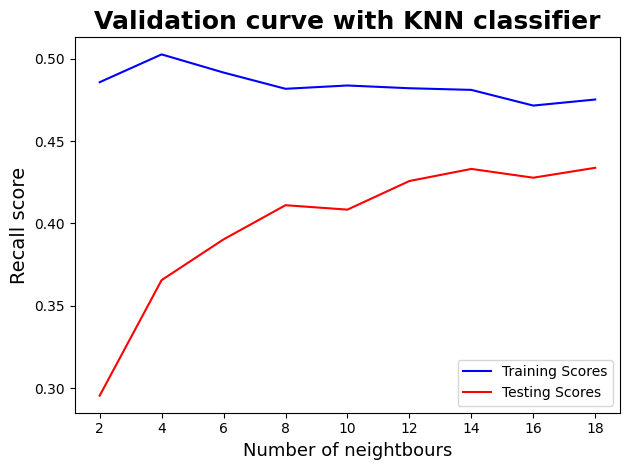

In [116]:
parameter_range=list(range(2,20,2))
train_score,valid_score=validation_curve(estimator=nearest_neighbor_cls,
                                        X=X_train,
                                        y=y_train,
                                        param_name="n_neighbors",
                                        param_range=parameter_range,
                                        cv=5,scoring="recall")

mean_train_score=np.mean(train_score,axis=1)
mean_valid_score=np.mean(valid_score,axis=1)

# plot mean recall scores for training and testing data
plt.plot(parameter_range,
         mean_train_score,
         label="Training Scores",
         color="b"
        )

plt.plot(parameter_range,
         mean_valid_score,
         label="Testing Scores",
         color="r"
        )
# creating the plot
plt.title("Validation curve with KNN classifier",
          fontdict={'size': 18, 'weight': 'bold'}
         )
plt.xlabel("Number of neightbours",
           fontsize=13
          )
plt.ylabel("Recall score",
           fontsize=14
          )
plt.tight_layout()
plt.legend(loc="best")
plt.show()

## confusion matrix

In [117]:
cf_matrix=confusion_matrix(y_train,predicted_values)
cf_matrix

array([[3733,  405],
       [ 840,  656]])

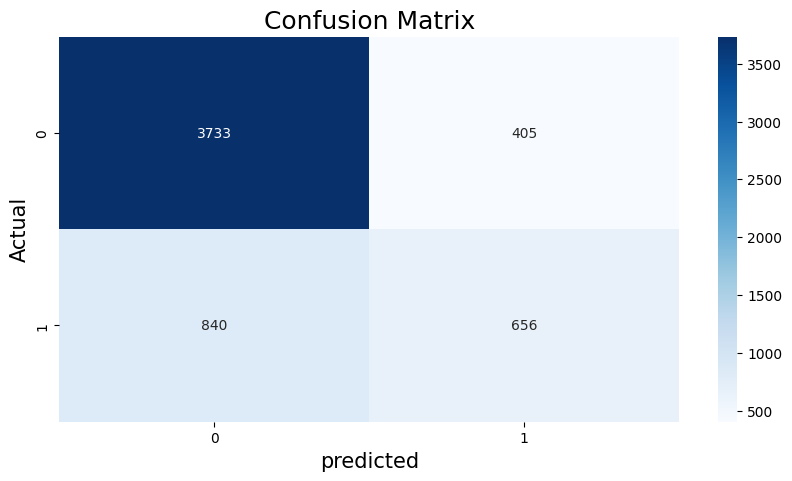

In [118]:
plt.figure(figsize=(10,5))
sns.heatmap(cf_matrix,
            annot=True,
            fmt='.0f',
            cmap='Blues'
           )

plt.xlabel("predicted",fontsize=15)
plt.ylabel("Actual",fontsize=15)
plt.title("Confusion Matrix",fontsize=18)
plt.show()

## classificaton report

In [119]:
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4138
           1       0.62      0.44      0.51      1496

    accuracy                           0.78      5634
   macro avg       0.72      0.67      0.69      5634
weighted avg       0.76      0.78      0.77      5634



# i want to increase the score of recall to do that let us see the relationship between the recall and the precision

In [120]:
y_scores_neighbor=cross_val_predict(estimator=nearest_neighbor_cls,
                              X=X_train,
                              y=y_train,
                              n_jobs=-1,
                              cv=5,
                              method='predict_proba'
                             )
y_scores_neighbor

array([[0.95, 0.05],
       [0.6 , 0.4 ],
       [0.3 , 0.7 ],
       ...,
       [0.8 , 0.2 ],
       [0.2 , 0.8 ],
       [1.  , 0.  ]])

## this module gives us the recall and the precision scores for each threshold

In [121]:
precision_values,recall_values,threshold_values=precision_recall_curve(y_train,y_scores_neighbor[:,1])
threshold_values

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [122]:
# each threshold value with its recall score
list(zip(threshold_values,recall_values))

[(0.0, 1.0),
 (0.05, 0.9766042780748663),
 (0.1, 0.9538770053475936),
 (0.15, 0.928475935828877),
 (0.2, 0.8977272727272727),
 (0.25, 0.857620320855615),
 (0.3, 0.80548128342246),
 (0.35, 0.7533422459893048),
 (0.4, 0.6938502673796791),
 (0.45, 0.6096256684491979),
 (0.5, 0.517379679144385),
 (0.55, 0.4385026737967914),
 (0.6, 0.3522727272727273),
 (0.65, 0.29010695187165775),
 (0.7, 0.2212566844919786),
 (0.75, 0.1751336898395722),
 (0.8, 0.1270053475935829),
 (0.85, 0.06818181818181818),
 (0.9, 0.03542780748663102),
 (0.95, 0.0106951871657754),
 (1.0, 0.00267379679144385)]

In [123]:
precision_values.shape,recall_values.shape,threshold_values.shape

((22,), (22,), (21,))

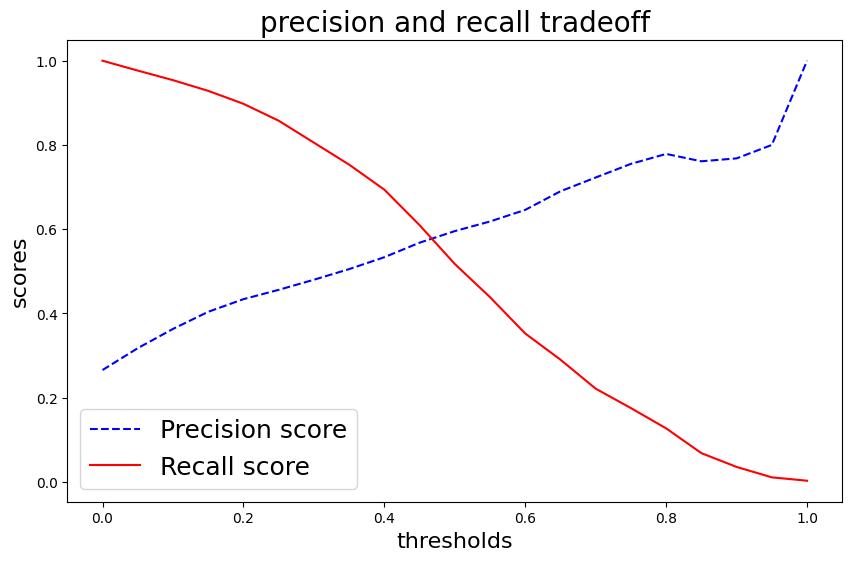

In [124]:
plt.figure(figsize=(10,6))
plt.plot(threshold_values,
         precision_values[:-1],
         "b--",
         label="Precision score"
        )

plt.plot(threshold_values,
         recall_values[:-1],
         "r-",
         label="Recall score"
        )

plt.title("precision and recall tradeoff",fontsize=20)
plt.xlabel("thresholds",fontsize=16)
plt.ylabel("scores",fontsize=16)
plt.legend(fontsize=18)
plt.show()

## ROC curve and AUC

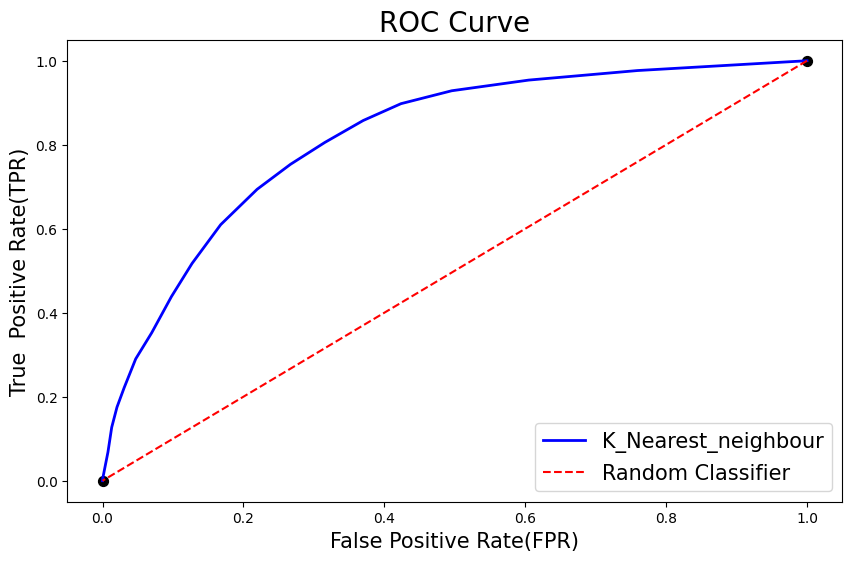

In [125]:
fpr,tpr,thresholds=roc_curve(y_train,y_scores_neighbor[:,1])
plt.figure(figsize=(10,6))
plt.plot(fpr,
         tpr,
         linewidth=2,
         color="b",
         label="K_Nearest_neighbour"
        )

plt.plot([1,0],[1,0],"r--",label="Random Classifier")
plt.scatter(0,0,color="black",s=50)
plt.scatter(1,1,color="black",s=50)
plt.title("ROC Curve",fontsize=20)
plt.xlabel("False Positive Rate(FPR)",fontsize=15)
plt.ylabel("True  Positive Rate(TPR)",fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [126]:
roc_auc_score(y_train,y_scores_neighbor[:,1])

0.8171975598535033

# this algorithm does not work well so i will skip it

## i will make a class to get the precision_recall_curve,canfusion matrix and the classification report and so on

In [127]:
class Get_Best_Algorithm_GridSearchCV(object):
    def __init__(self,grid_model=None):
        self.grid_model=grid_model
    def get_best_parms(self):
        best_parms = self.grid_model.best_params_
        print(f'Best Parameter using {self.grid_model.estimator.__class__.__name__} -- ', best_parms)
        
    def get_best_estimator(self):
        best_estimator=self.grid_model.best_estimator_
        print(f'the best estimaror for {self.grid_model.estimator.__class__.__name__} -- ', best_estimator)
        self.model=best_estimator
        #return best_estimator
    
    

In [128]:
class Cls_algorithm_func(Get_Best_Algorithm_GridSearchCV):
    models = pd.DataFrame(columns=["Model","precision","recall","f1_score","accuracy"])
    def __init__(self,model,X_train,y_train,grid_model=None):
        self.model=model
        self.X_train=X_train
        self.y_train=y_train
        self.predicted_values=None
        self.y_scores_proba=None
        self.name_model=model.__class__.__name__
        Get_Best_Algorithm_GridSearchCV.__init__(self,grid_model)
    
    def add_evaluation_scores(self):
        label=self.name_model
        if label=="NoneType":
            label=self.grid_model.estimator.__class__.__name__
        report=self.get_classification_report()
        selected_rows=pd.DataFrame(report.loc["1",["precision","recall","f1-score"]]).transpose()
        accuracy=report.loc["accuracy","precision"]
        selected_rows["accuracy"]=accuracy
        selected_rows.insert(loc=0, column='Model', value=label)
        selected_rows = selected_rows.to_dict(orient='records')[0]
        
        if Cls_algorithm_func.models[Cls_algorithm_func.models["Model"]==label].shape[0]==0:
            Cls_algorithm_func.models.loc[len(Cls_algorithm_func.models.index)]=list(selected_rows.values())
        elif Cls_algorithm_func.models[Cls_algorithm_func.models["Model"]==label].shape[0]==1 and Cls_algorithm_func.models.loc[Cls_algorithm_func.models.shape[0]-1].to_dict()["f1_score"]<report.loc["1","f1-score"]:
            Cls_algorithm_func.models.loc[len(Cls_algorithm_func.models.index)-1]=list(selected_rows.values())
        else:
            pass
            
    # to print the evaluation scores
    def __print_evaluation_scores(self,accuracy_validation,recall_validation,accuracy_train_data,recall_train_data):
        print(f"{self.name_model}\n")
        print(f"the evaluation scores for validation")
        print(f"accuracy score: {accuracy_validation} \n recall score: {recall_validation}\n")

        print(f"the evaluation scores for training data")
        print(f"accuracy score: {accuracy_train_data} \n recall score: {recall_train_data}\n")
        
    # to get the cross validation predicted values and i print the evaluation scores if we want using the above func
    def evaluation_metrics(self,decision=None):
        model=self.model
        X_train=self.X_train
        y_train=self.y_train
      
        #         the predicted values using evaluation method
        #         model_validation_pred=cross_val_predict(estimator=model,
        #                                           X=X_train,
        #                                           y=y_train,
        #                                           n_jobs=-1,
        #                                           cv=5,
        #                                           method='predict'
        #                                          )
        
        if self.predicted_values is None or (self.predicted_values==None).all():
            # the predicted values using evaluation method
            model_validation_pred=cross_val_predict(estimator=model,
                                              X=X_train,
                                              y=y_train,
                                              n_jobs=-1,
                                              cv=5,
                                              method='predict'
                                             )
            self.predicted_values=model_validation_pred
        
        # the predicted values using the same training data to see if there is any overfitting
        model_train_pred=model.predict(X_train)
        self.add_evaluation_scores()
        # the values of matrics for 
        # these are for validation 
        accuracy_validation=accuracy_score(y_train,model_validation_pred)
        recall_validation=recall_score(y_train,model_validation_pred)

        # these are for training data
        accuracy_train_data=accuracy_score(y_train,model_train_pred)
        recall_train_data=recall_score(y_train,model_train_pred)
        if decision==0:
            pass
        else:
            decision=int(input("if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0: " ))
            while True:
                if decision==1:
                    self.__print_evaluation_scores(accuracy_validation,recall_validation,accuracy_train_data,recall_train_data)
                    break
                elif decision==0:
                    break
                else:
                    decision=int(input("Please enter one of the weighted numbers: "))
        return model_validation_pred
    
    # plot the confusion matrix
    def plot_confusion_matrix(self):
        if self.predicted_values is None or (self.predicted_values==None).all(): 
            predicted_values=self.evaluation_metrics(0)
        else:
            predicted_values=self.predicted_values
        
        cf_matrix=confusion_matrix(self.y_train,predicted_values)
        plt.figure(figsize=(10,5))
        sns.heatmap(cf_matrix,
                    annot=True,
                    fmt='.0f',
                    cmap='Blues'
                   )

        plt.xlabel("predicted",fontsize=15)
        plt.ylabel("Actual",fontsize=15)
        plt.title("Confusion Matrix",fontsize=18)
        plt.show()
        
    def get_classification_report(self):
        if self.predicted_values is None or (self.predicted_values==None).all():
            predicted_values=self.evaluation_metrics(0)
        else:
            predicted_values=self.predicted_values
        
        cls_report=classification_report(self.y_train,predicted_values,output_dict=True)
        cls_report = pd.DataFrame(cls_report).transpose()
        return cls_report
        
     
    # to get the the probability of each instance
    def get_proba(self):
        try:
            y_proba_scores=cross_val_predict(estimator=self.model,
                      X=self.X_train,
                      y=self.y_train,
                      n_jobs=-1,
                      cv=5,
                      method='predict_proba'
                     )
        except:
            y_proba_scores=cross_val_predict(estimator=self.model,
                                  X=self.X_train,
                                  y=self.y_train,
                                  n_jobs=-1,
                                  cv=5,
                                  method='decision_function'
                                 )
        self.y_proba_scores=y_proba_scores
        return y_proba_scores

    def precision_recall_thresholds(self):
        if self.y_scores_proba is None or (self.y_scores_proba==None).all():
            y_scores_proba=self.get_proba()
        else:
            y_scores_proba=self.y_scores_proba
            
        try:
            a=len(y_scores_proba[0])==2
            return precision_recall_curve(self.y_train,y_scores_proba[:,1])
        except:
            return precision_recall_curve(self.y_train,y_scores_proba)
        
    # precision and recall tradeoff
    def precision_recall_tradeoff(self):
        precision_values,recall_values,threshold_values=self.precision_recall_thresholds()
        plt.figure(figsize=(10,6))
        plt.plot(threshold_values,
                 precision_values[:-1],
                 "b--",
                 label="Precision score"
                )

        plt.plot(threshold_values,
                 recall_values[:-1],
                 "r-",
                 label="Recall score"
                )
        label=self.name_model
        if label=="NoneType":
            label=self.grid_model.estimator.__class__.__name__ 
        plt.title(f"precision and recall tradeoff for {label} algorithm",fontsize=20)
        plt.xlabel("thresholds",fontsize=16)
        plt.ylabel("scores",fontsize=16)
        plt.legend(fontsize=18)
        plt.show()
        
    # plot ROC curve
    def __plot_roc_curve(self,fpr,tpr,thresholds):
        label=self.name_model
        if label=="NoneType":
            label=self.grid_model.estimator.__class__.__name__
        plt.figure(figsize=(10,6))
        plt.plot(fpr,
                 tpr,
                 linewidth=2,
                 color="b",
                 label=label
                )

        plt.plot([1,0],[1,0],"r--",label="Random Classifier")
        plt.scatter(0,0,color="black",s=50)
        plt.scatter(1,1,color="black",s=50)
        plt.title("ROC Curve",fontsize=20)
        plt.xlabel("False Positive Rate(FPR)",fontsize=15)
        plt.ylabel("True  Positive Rate(TPR)",fontsize=15)
        plt.legend(fontsize=15)
        plt.show()
        
    def plot_roc_curve(self):
        if self.y_scores_proba is None or (self.y_scores_proba==None).all():
            y_scores_proba=self.get_proba()
        else:
            y_scores_proba=self.y_scores_proba
            
        try:
            a=len(y_scores_proba[0])==2
            fpr,tpr,thresholds=roc_curve(y_train,y_scores_proba[:,1])
        except:
            fpr,tpr,thresholds=roc_curve(y_train,y_scores_proba)

        self.__plot_roc_curve(fpr,tpr,thresholds)
    
    # get AUC SCORE (which is the area under the curve)
    def get_auc_score(self):
        if self.y_scores_proba is None or (self.y_scores_proba==None).all():
            y_scores_proba=self.get_proba()
        else:
            y_scores_proba=self.y_scores_proba
        try:
            a=len(y_scores_proba[0])==2
            return roc_auc_score(y_train,y_scores_proba[:,1])
        except:
            return roc_auc_score(y_train,y_scores_proba)

In [131]:
k_nearest_neighbor_class=Cls_algorithm_func(nearest_neighbor_cls,X_train,y_train)
k_nearest_neighbor_class.evaluation_metrics()

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  0


array([0, 0, 1, ..., 0, 1, 0])

# SGDClassifier algorithm

In [132]:
sgd_clf = SGDClassifier(penalty=None, random_state=42)
sgd_clf.fit(X_train, y_train)
evaluation_func(sgd_clf,X_train,y_train)

SGDClassifier

the evaluation scores for validation
accuracy score: 0.7864749733759319 
 recall score: 0.48462566844919786

the evaluation scores for training data
accuracy score: 0.7894923677671282 
 recall score: 0.5267379679144385



array([0, 0, 0, ..., 0, 1, 0])

# Naive Bayes algorithm

## Gaussian Naive bayes

In [133]:
gaussian_nb_clf=GaussianNB()
gaussian_nb_clf.fit(X_train,y_train)

GaussianNB()

In [134]:
gaussian_nb_clf_class=Cls_algorithm_func(gaussian_nb_clf,X_train,y_train)

## Gaussian naive bayes algorithm works so well and there is no ant overfitting

In [135]:
gaussian_nb_clf_class.evaluation_metrics()

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  0


array([0, 0, 1, ..., 1, 1, 0])

In [136]:
gaussian_nb_clf_class.get_classification_report()

,precision,recall,f1-score,support
0,0.908236,0.676897,0.775685,4138.00000
1,0.475686,0.810829,0.599605,1496.00000
accuracy,0.712460,0.712460,0.712460,0.71246
macro avg,0.691961,0.743863,0.687645,5634.00000
weighted avg,0.793381,0.712460,0.728931,5634.00000


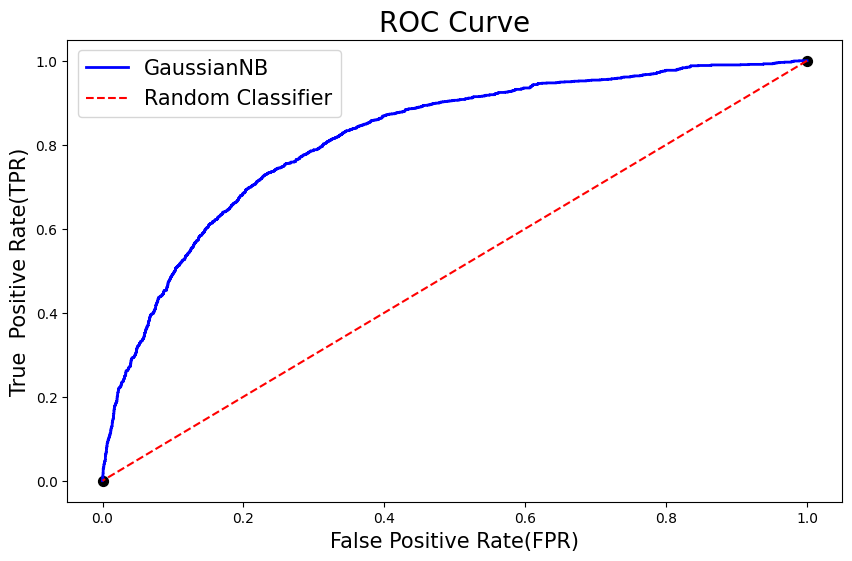

In [137]:
gaussian_nb_clf_class.plot_roc_curve()

## Bernoulli Naive Bayes

In [138]:
bernoulli_nb_clf=BernoulliNB()
bernoulli_nb_clf.fit(X_train,y_train)

BernoulliNB()

In [139]:
bernoulli_nb_clf_class=Cls_algorithm_func(bernoulli_nb_clf,X_train,y_train)

In [140]:
bernoulli_nb_clf_class.get_classification_report()

,precision,recall,f1-score,support
0,0.834986,0.793620,0.813778,4138.000000
1,0.497942,0.566176,0.529872,1496.000000
accuracy,0.733227,0.733227,0.733227,0.733227
macro avg,0.666464,0.679898,0.671825,5634.000000
weighted avg,0.745491,0.733227,0.738392,5634.000000


## Multinomial Naive bayes

In [141]:
multinomial_nb_clf=MultinomialNB()
multinomial_nb_clf.fit(X_train,y_train)

MultinomialNB()

In [142]:
multinomial_nb_clf_class=Cls_algorithm_func(multinomial_nb_clf,X_train,y_train)

## it works so well with the another value which is represent to 0 value but unfortunately we don't need it

In [143]:
multinomial_nb_clf_class.get_classification_report()

,precision,recall,f1-score,support
0,0.769484,0.959159,0.853916,4138.000000
1,0.644958,0.205214,0.311359,1496.000000
accuracy,0.758963,0.758963,0.758963,0.758963
macro avg,0.707221,0.582186,0.582637,5634.000000
weighted avg,0.736419,0.758963,0.709850,5634.000000


# Logistic Regression

## hyperparameter tuning(GridSearchCV)

In [144]:
# binary classification
solver=["lbfgs","libliear"]
C=np.arange(0.1,2,0.3)
max_iter=[100,1000,200]
params_logistic_reg={"solver":solver,
                     "C":C,
                     "max_iter":max_iter
                    }

logistic_reg=LogisticRegression(n_jobs=-1,class_weight=dic)

grid_logistic_reg=GridSearchCV(estimator=logistic_reg,
                               param_grid=params_logistic_reg,
                               scoring=make_scorer(f1_score),
                               n_jobs=-1,
                               cv=5
                              )

grid_logistic_reg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight={0: 0.680763653939101,
                                                        1: 1.8830213903743316},
                                          n_jobs=-1),
             n_jobs=-1,
             param_grid={'C': array([0.1, 0.4, 0.7, 1. , 1.3, 1.6, 1.9]),
                         'max_iter': [100, 1000, 200],
                         'solver': ['lbfgs', 'libliear']},
             scoring=make_scorer(f1_score))

## the best estimator using GridSearchCV

In [145]:
grid_logistic_reg_class=Cls_algorithm_func(None,X_train,y_train,grid_logistic_reg)
grid_logistic_reg_class.get_best_estimator()

the best estimaror for LogisticRegression --  LogisticRegression(C=0.1,
                   class_weight={0: 0.680763653939101, 1: 1.8830213903743316},
                   n_jobs=-1)


LogisticRegression(C=0.1,
                   class_weight={0: 0.680763653939101, 1: 1.8830213903743316},
                   n_jobs=-1)

## evaluate the model

In [146]:
grid_logistic_reg_class.evaluation_metrics()

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  0


array([0, 0, 1, ..., 0, 1, 0])

In [147]:
grid_logistic_reg_class.get_classification_report()

,precision,recall,f1-score,support
0,0.913361,0.695505,0.789683,4138.000000
1,0.492549,0.817513,0.614727,1496.000000
accuracy,0.727902,0.727902,0.727902,0.727902
macro avg,0.702955,0.756509,0.702205,5634.000000
weighted avg,0.801622,0.727902,0.743227,5634.000000


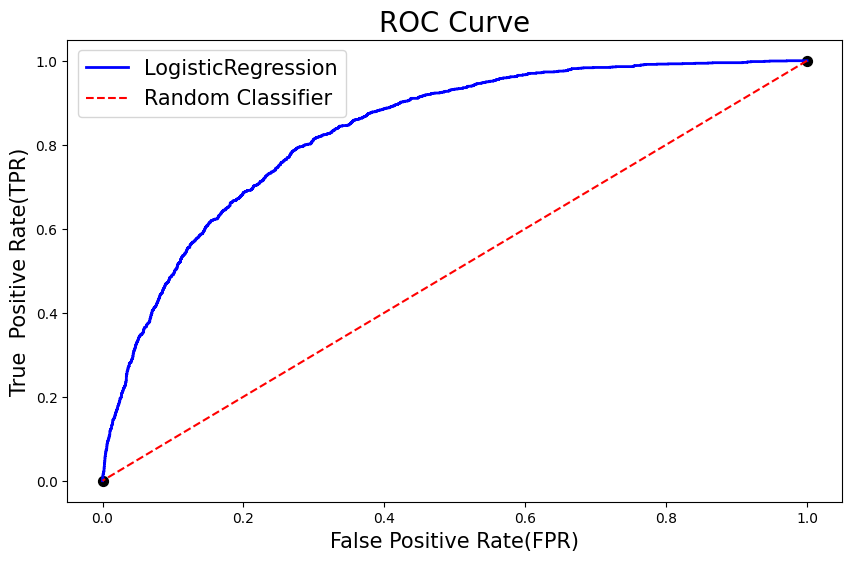

In [148]:
grid_logistic_reg_class.plot_roc_curve()

# Support Vector Machine

## Linear SVC

In [149]:
linear_svc_cls=LinearSVC(penalty="l2",
                         loss="squared_hinge",
                         C=1,
                         class_weight=dic,
                         max_iter=1000,
                        )
linear_svc_cls.fit(X_train,y_train)

LinearSVC(C=1, class_weight={0: 0.680763653939101, 1: 1.8830213903743316})

In [150]:
linear_svc_cls_class=Cls_algorithm_func(linear_svc_cls,X_train,y_train,None)

In [151]:
linear_svc_cls_class.evaluation_metrics()

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  0


array([0, 0, 1, ..., 0, 1, 0])

## SVC (polynomial kernel)

In [152]:
poly_svc_cls=SVC(C=1,
                 kernel="poly",
                 degree=2,
                 max_iter=-1,
                 class_weight=dic,
                 coef0=1.0
                )
poly_svc_cls.fit(X_train,y_train)

SVC(C=1, class_weight={0: 0.680763653939101, 1: 1.8830213903743316}, coef0=1.0,
    degree=2, kernel='poly')

In [153]:
poly_svc_cls_class=Cls_algorithm_func(poly_svc_cls,X_train,y_train)
poly_svc_cls_class.evaluation_metrics()

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  0


array([0, 0, 1, ..., 0, 1, 0])

In [154]:
poly_svc_cls_class.get_auc_score()

0.8255833826566349

## SVC (RBF kernel)

In [155]:
rbf_svc_cls=SVC(kernel="rbf",
                C=100.0,
                coef0=1.0,
                gamma=1
               )
rbf_svc_cls.fit(X_train,y_train)

SVC(C=100.0, coef0=1.0, gamma=1)

In [156]:
rbf_svc_cls_class=Cls_algorithm_func(rbf_svc_cls,X_train,y_train)
rbf_svc_cls_class.evaluation_metrics()

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  0


array([0, 0, 1, ..., 0, 1, 0])

# Decision Trees classification algorithm using CART technique

In [157]:
decision_tree_cls=DecisionTreeClassifier(criterion="gini",
                                          splitter="best",
                                          max_depth=4,
                                          max_features=1.0,
                                          class_weight=dic,
                                         )
    
decision_tree_cls.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.680763653939101,
                                     1: 1.8830213903743316},
                       max_depth=4, max_features=1.0)

In [158]:
decision_tree_cls_class=Cls_algorithm_func(decision_tree_cls,X_train,y_train)
decision_tree_cls_class.evaluation_metrics()

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  0


array([0, 0, 1, ..., 0, 1, 0])

## plot the graph of the dedcision trees algorithm 

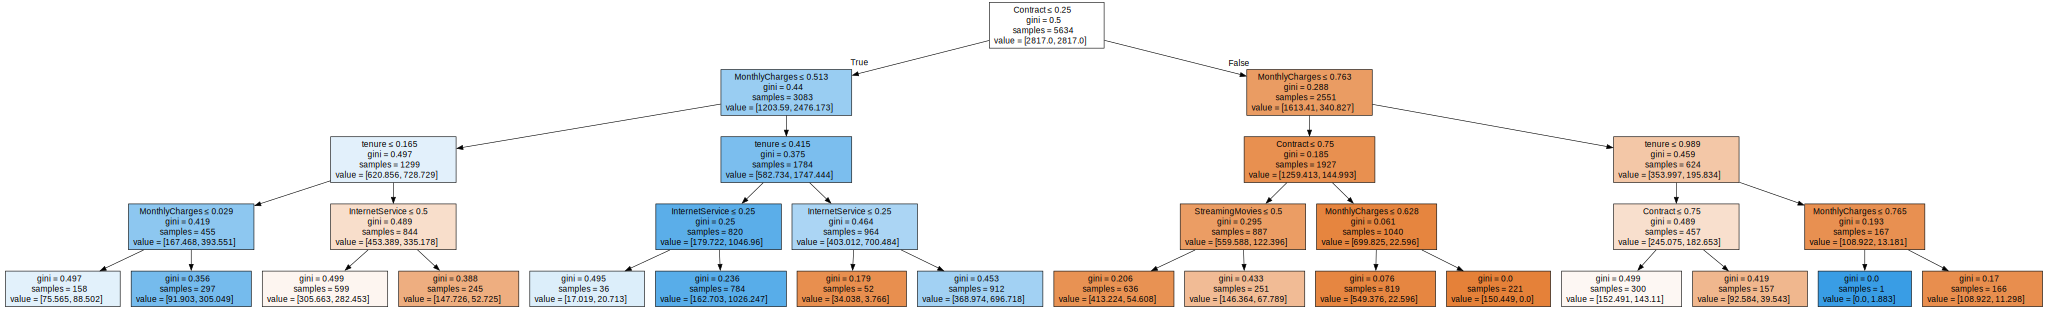

In [159]:
dot_data = tree.export_graphviz(decision_tree_cls, out_file=None) 
graph = graphviz.Source(dot_data) 
dot_data = tree.export_graphviz(decision_tree_cls,
                                feature_names=X_train.columns,filled=True,
                                special_characters=True
                            
                                ) 
graph = graphviz.Source(dot_data)  
graph

In [ ]:
Cls_algorithm_func.models

# Random Forest Algorithm

In [161]:
random_forest_cls=RandomForestClassifier(n_estimators=100,
                                         criterion='gini',
                                         max_depth=5,
                                         oob_score=True,
                                         max_features="sqrt",
                                         bootstrap=True,
                                         n_jobs=-1,
                                         class_weight=dic
                                        )
random_forest_cls.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.680763653939101,
                                     1: 1.8830213903743316},
                       max_depth=5, n_jobs=-1, oob_score=True)

In [162]:
random_forest_cls_class=Cls_algorithm_func(random_forest_cls,X_train,y_train)
random_forest_cls_class.evaluation_metrics()

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  0


array([0, 0, 1, ..., 0, 1, 0])

In [163]:
feature_importance=random_forest_cls.feature_importances_
feature_names=random_forest_cls.feature_names_in_
list(zip(feature_names,feature_importance))

[('tenure', 0.20844480825518943),
 ('InternetService', 0.12096410131640946),
 ('OnlineSecurity', 0.03324548015496418),
 ('DeviceProtection', 0.0019867801340719693),
 ('TechSupport', 0.014344314143470798),
 ('StreamingMovies', 0.01217220119800624),
 ('StreamingTV', 0.007741523095513559),
 ('Contract', 0.3014329014392765),
 ('PaymentMethod', 0.03309442822889927),
 ('MonthlyCharges', 0.12753078779411386),
 ('TotalCharges', 0.08194876455586676),
 ('tenure_year', 0.057093909684217986)]

# boosting techniques

## boosting:the general idea of most boosting methods is to train predictors "sequetially",each trying to correct its predecessor

# AdaBoost Technique

In [218]:
adaboost_cls=AdaBoostClassifier(estimator=random_forest_cls,
                                n_estimators=100,
                                learning_rate=0.01,
                                algorithm="SAMME"
                               )

adaboost_cls.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=RandomForestClassifier(class_weight={0: 0.680763653939101,
                                                                  1: 1.8830213903743316},
                                                    max_depth=5, n_jobs=-1,
                                                    oob_score=True),
                   learning_rate=0.01, n_estimators=100)

In [165]:
adaboost_cls_class=Cls_algorithm_func(adaboost_cls,X_train,y_train)
adaboost_cls_class.evaluation_metrics()

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  1


AdaBoostClassifier

the evaluation scores for validation
accuracy score: 0.748136315228967 
 recall score: 0.7934491978609626

the evaluation scores for training data
accuracy score: 0.7635782747603834 
 recall score: 0.8315508021390374



array([0, 0, 1, ..., 0, 1, 0])

In [166]:
feature_importance=adaboost_cls.feature_importances_
feature_names=adaboost_cls.feature_names_in_
list(zip(feature_names,feature_importance))

[('tenure', 0.18147298824364028),
 ('InternetService', 0.12364097096853661),
 ('OnlineSecurity', 0.028036614569889512),
 ('DeviceProtection', 0.0033882301357359987),
 ('TechSupport', 0.02098268301152459),
 ('StreamingMovies', 0.017617248358790093),
 ('StreamingTV', 0.012100751596749781),
 ('Contract', 0.28663357833105146),
 ('PaymentMethod', 0.03755675772405939),
 ('MonthlyCharges', 0.14031268443056374),
 ('TotalCharges', 0.10932161128723754),
 ('tenure_year', 0.03893588134222105)]

# Gradient Boosting Technique

In [213]:
gradient_boosting_cls=GradientBoostingClassifier(loss="log_loss",
                                                 learning_rate=0.1,
                                                 n_estimators=50,
                                                 criterion='squared_error',
                                                 max_depth=4,
                                                 max_features=0.1,subsample=0.8)
gradient_boosting_cls.fit(X_train,y_train)

GradientBoostingClassifier(criterion='squared_error', max_depth=4,
                           max_features=0.1, n_estimators=50, subsample=0.8)

In [214]:
gradient_boosting_cls_class=Cls_algorithm_func(gradient_boosting_cls,X_train,y_train)
gradient_boosting_cls_class.evaluation_metrics()

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  1


GradientBoostingClassifier

the evaluation scores for validation
accuracy score: 0.7962371317003905 
 recall score: 0.4919786096256685

the evaluation scores for training data
accuracy score: 0.81008164714235 
 recall score: 0.5187165775401069



array([0, 0, 1, ..., 0, 1, 0])

## hyperparameter tuning(GridSearchCV)

In [220]:
# binary classification
n_estimators=[100, 150, 200,50]
learning_rate=[0.01, 0.1, 0.2, 0.3]
max_depth=[3, 5, 7, 9]
min_samples_leaf=[1, 2, 4, 8]
min_samples_split=[2, 5, 10, 20]
subsample=[0.8, 0.9, 1.0]
params_gradient_boosting_cls={"n_estimators":n_estimators,
                     "learning_rate":learning_rate,
                     "max_depth":max_depth,
                     "min_samples_leaf":min_samples_leaf,
                     "min_samples_split":min_samples_split,
                     "subsample":subsample
                    }


grid_gradient_boosting_cls=GridSearchCV(estimator=gradient_boosting_cls,
                               param_grid=params_gradient_boosting_cls,
                               scoring=make_scorer(f1_score),
                               n_jobs=-1,
                               cv=5
                              )

grid_gradient_boosting_cls.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(criterion='squared_error',
                                                  max_depth=4, max_features=0.1,
                                                  n_estimators=50,
                                                  subsample=0.8),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                         'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 150, 200, 50],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring=make_scorer(f1_score))

In [221]:
grid_gradient_boosting_cls_class=Cls_algorithm_func(None,X_train,y_train,grid_gradient_boosting_cls)
grid_gradient_boosting_cls_class.get_best_estimator()

the best estimaror for GradientBoostingClassifier --  GradientBoostingClassifier(criterion='squared_error', max_features=0.1,
                           min_samples_leaf=4, min_samples_split=20,
                           n_estimators=200, subsample=0.8)


GradientBoostingClassifier(criterion='squared_error', max_features=0.1,
                           min_samples_leaf=4, min_samples_split=20,
                           n_estimators=200, subsample=0.8)

In [223]:
grid_gradient_boosting_cls_class.evaluation_metrics()

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  1


NoneType

the evaluation scores for validation
accuracy score: 0.7957046503372383 
 recall score: 0.5040106951871658

the evaluation scores for training data
accuracy score: 0.8093716719914803 
 recall score: 0.5340909090909091



array([0, 0, 1, ..., 0, 1, 0])

# Extreme Gradient Boosting (XGBoost) Technique

In [213]:
xgboost_cls=XGBClassifier(n_estimators=50,
                          max_depth=5,
                          learning_rate=0.1,
                          n_jobs=-1,
                          gamma=1)
xgboost_cls.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [214]:
xgboost_cls_class=Cls_algorithm_func(xgboost_cls,X_train,y_train)
xgboost_cls_class.evaluation_metrics()

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  1


XGBClassifier

the evaluation scores for validation
accuracy score: 0.7957046503372383 
 recall score: 0.517379679144385

the evaluation scores for training data
accuracy score: 0.8178913738019169 
 recall score: 0.5528074866310161



array([0, 0, 1, ..., 0, 1, 0])

In [215]:
xgboost_cls_class.get_classification_report()

,precision,recall,f1-score,support
0,0.837057,0.896327,0.865679,4138.000000
1,0.643392,0.517380,0.573546,1496.000000
accuracy,0.795705,0.795705,0.795705,0.795705
macro avg,0.740224,0.706853,0.719612,5634.000000
weighted avg,0.785633,0.795705,0.788108,5634.000000


# Catboost Technique

In [229]:
cat_boost_cls=CatBoostClassifier(iterations=55,
                                 learning_rate=0.1,
                                 max_depth=6,
                                 #task_type="GPU",
                                 devices='0:1'
                                )
cat_boost_cls.fit(X_train,y_train)

cat_boost_cls_class=Cls_algorithm_func(cat_boost_cls,X_train,y_train)
cat_boost_cls_class.evaluation_metrics()

0:	learn: 0.6547401	total: 2.17ms	remaining: 117ms
1:	learn: 0.6260585	total: 3.98ms	remaining: 106ms
2:	learn: 0.6001690	total: 6.25ms	remaining: 108ms
3:	learn: 0.5772961	total: 8.3ms	remaining: 106ms
4:	learn: 0.5563468	total: 10.2ms	remaining: 102ms
5:	learn: 0.5389999	total: 12.2ms	remaining: 100ms
6:	learn: 0.5242045	total: 14.1ms	remaining: 96.7ms
7:	learn: 0.5111707	total: 15.8ms	remaining: 92.9ms
8:	learn: 0.5004372	total: 17.4ms	remaining: 89ms
9:	learn: 0.4901153	total: 19.1ms	remaining: 85.8ms
10:	learn: 0.4822886	total: 20.7ms	remaining: 82.7ms
11:	learn: 0.4747631	total: 22.3ms	remaining: 79.9ms
12:	learn: 0.4674560	total: 23.9ms	remaining: 77.3ms
13:	learn: 0.4616797	total: 25.5ms	remaining: 74.6ms
14:	learn: 0.4562174	total: 27.3ms	remaining: 72.7ms
15:	learn: 0.4517154	total: 28.8ms	remaining: 70.3ms
16:	learn: 0.4484576	total: 29.8ms	remaining: 66.6ms
17:	learn: 0.4447154	total: 31.5ms	remaining: 64.8ms
18:	learn: 0.4411359	total: 33.5ms	remaining: 63.4ms
19:	learn: 0

if you want to print the scores of the accuracy and the recall enter 1 and if you do not enter 0:  1


CatBoostClassifier

the evaluation scores for validation
accuracy score: 0.8006744763933262 
 recall score: 0.5053475935828877

the evaluation scores for training data
accuracy score: 0.8086616968406106 
 recall score: 0.5220588235294118



array([0, 0, 1, ..., 0, 1, 0])

15:	learn: 0.4516251	total: 38.9ms	remaining: 82.6ms
16:	learn: 0.4474450	total: 40.5ms	remaining: 78.5ms
17:	learn: 0.4436048	total: 43.1ms	remaining: 76.7ms
18:	learn: 0.4397476	total: 45.3ms	remaining: 73.9ms
19:	learn: 0.4367123	total: 47.3ms	remaining: 70.9ms
20:	learn: 0.4342480	total: 48.4ms	remaining: 66.8ms
21:	learn: 0.4315405	total: 50.4ms	remaining: 64.2ms
22:	learn: 0.4287164	total: 52.6ms	remaining: 61.7ms
23:	learn: 0.4262148	total: 54.7ms	remaining: 59.2ms
24:	learn: 0.4242356	total: 56.4ms	remaining: 56.4ms
25:	learn: 0.4224280	total: 58.2ms	remaining: 53.7ms
26:	learn: 0.4206161	total: 60ms	remaining: 51.1ms
27:	learn: 0.4190250	total: 61.8ms	remaining: 48.5ms
28:	learn: 0.4174813	total: 63.6ms	remaining: 46.1ms
29:	learn: 0.4160257	total: 65.4ms	remaining: 43.6ms
30:	learn: 0.4149958	total: 66.8ms	remaining: 41ms
31:	learn: 0.4140701	total: 68.6ms	remaining: 38.6ms
32:	learn: 0.4130328	total: 70.4ms	remaining: 36.2ms
33:	learn: 0.4118001	total: 72.2ms	remaining: 34ms